## Python Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

# library for Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# libraries for confusion Matrix, Classification Repports, ROC and AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

# Library for Training and testing data split
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
# Visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import pandas as pd
import numpy as np

import glob
glob.glob("*.csv")

['Final_dataset (2).csv', 'technologies_used.csv']

## Data Loading

In [2]:
final_dataset = pd.read_csv("Final_dataset (2).csv")
final_dataset.head(5)

,Unnamed: 0,Terminology,Title,Companies Associated,start_year,end_year,FCS(Minimum_Citation_Date),FCS(Maximum_Citation_Date),FCS(Average_Citation_Date),FCS(Number_of_Citations),BCS(Minimum_Citation_Date),BCS(Maximum_Citation_Date),BCS(Average_Citation_Date),BCS(Number_of_Citations),authors,keywords,superclasses
0,0,adaptive systems,On-line Viterbi Algorithm and Its Relationship...,"Zipf,Small-World",3/31/2007,2019,2007,2019,2013.933333,15,1973,2007,1993.444444,18,3,Viterbi algorithm,"['bioinformatics', 'markov processes', 'graph ..."
1,1,adaptive systems,The Cyborg Astrobiologist: Porting from a wear...,NaN,7/5/2007,2013,2009,2013,2010.666667,3,1996,2006,2003.000000,14,14,"Cyborg, Wearable computer, Camera phone, Compu...","['telephone sets', 'cellular telephone systems..."
2,2,adaptive systems,Algorithmic Arithmetic Fewnomial Theory I: One...,NaN,11/16/2007,2009,2009,2009,2009.000000,1,1969,2006,1992.400000,30,3,NaN,"['formal verifications', 'formal logic', 'comb..."
3,3,adaptive systems,Instruction sequences with dynamically instant...,"Artifi,AIS,AIS,AIS,AIS,DCA,simulation environ-...",11/27/2007,2013,2007,2013,2009.272727,22,1988,2010,2004.000000,29,2,"Operational semantics, Denotational semantics,...","['formal methods', 'formal languages', 'softwa..."
4,4,adaptive systems,On the Monotonicity of the Generalized Marcum ...,NaN,12/26/2007,2020,2008,2020,2014.426667,75,1899,2010,1989.790123,81,3,"Stochastic process, MIMO, Information theory, ...",['communication channels (information theory)'...


In [3]:
final_dataset.head(1).values

array([[0, 'adaptive systems',
        'On-line Viterbi Algorithm and Its Relationship to Random Walks',
        'Zipf,Small-World', '3/31/2007', 2019, 2007, 2019, 2013.933333,
        15, 1973, 2007, 1993.444444, 18, 3, 'Viterbi algorithm',
        "['bioinformatics', 'markov processes', 'graph theory', 'random processes', 'convolutional codes', 'data mining', 'data communication systems', 'database systems']"]],
      dtype=object)

In [4]:
final_dataset.columns

Index(['Unnamed: 0', 'Terminology', 'Title', 'Companies Associated',
       'start_year', 'end_year', 'FCS(Minimum_Citation_Date)',
       'FCS(Maximum_Citation_Date)', 'FCS(Average_Citation_Date)',
       'FCS(Number_of_Citations)', 'BCS(Minimum_Citation_Date)',
       'BCS(Maximum_Citation_Date)', 'BCS(Average_Citation_Date)',
       'BCS(Number_of_Citations)', 'authors', 'keywords', 'superclasses'],
      dtype='object')

In [5]:
final_dataset.shape

(20012, 17)

## Load Label Files

In [6]:
technologies_used = pd.read_csv("technologies_used.csv")
technologies_used.head(5)

,Unnamed: 0,0
0,0,adaptive systems
1,1,computer systems
2,2,expert systems
3,3,data mining
4,4,public key cryptography


In [7]:
final_dataset.loc[final_dataset['Terminology'].isin(list(technologies_used['0'])), "tech_mainstream"] = "Yes"
final_dataset['tech_mainstream'] = final_dataset['tech_mainstream'].fillna("Not")

In [8]:
final_dataset['tech_mainstream'].value_counts()

Yes    13238
Not     6774
Name: tech_mainstream, dtype: int64

In [9]:
import random
final_dataset[final_dataset['Terminology'] == random.choice(final_dataset["Terminology"].values.tolist())]['tech_mainstream'].value_counts()

Not    2789
Name: tech_mainstream, dtype: int64

In [10]:
del technologies_used

final_dataset.head(2)

,Unnamed: 0,Terminology,Title,Companies Associated,start_year,end_year,FCS(Minimum_Citation_Date),FCS(Maximum_Citation_Date),FCS(Average_Citation_Date),FCS(Number_of_Citations),BCS(Minimum_Citation_Date),BCS(Maximum_Citation_Date),BCS(Average_Citation_Date),BCS(Number_of_Citations),authors,keywords,superclasses,tech_mainstream
0,0,adaptive systems,On-line Viterbi Algorithm and Its Relationship...,"Zipf,Small-World",3/31/2007,2019,2007,2019,2013.933333,15,1973,2007,1993.444444,18,3,Viterbi algorithm,"['bioinformatics', 'markov processes', 'graph ...",Yes
1,1,adaptive systems,The Cyborg Astrobiologist: Porting from a wear...,NaN,7/5/2007,2013,2009,2013,2010.666667,3,1996,2006,2003.000000,14,14,"Cyborg, Wearable computer, Camera phone, Compu...","['telephone sets', 'cellular telephone systems...",Yes


## Missing Values Analysis

In [11]:
final_dataset.isna().sum()

Unnamed: 0                        0
Terminology                       0
Title                             0
Companies Associated          17405
start_year                        0
end_year                          0
FCS(Minimum_Citation_Date)        0
FCS(Maximum_Citation_Date)        0
FCS(Average_Citation_Date)        0
FCS(Number_of_Citations)          0
BCS(Minimum_Citation_Date)        0
BCS(Maximum_Citation_Date)        0
BCS(Average_Citation_Date)        0
BCS(Number_of_Citations)          0
authors                           0
keywords                        108
superclasses                      0
tech_mainstream                   0
dtype: int64

## Unique Values

In [12]:
final_dataset.nunique()

Unnamed: 0                    20012
Terminology                     143
Title                         19990
Companies Associated            991
start_year                     1999
end_year                         15
FCS(Minimum_Citation_Date)       15
FCS(Maximum_Citation_Date)       15
FCS(Average_Citation_Date)     3502
FCS(Number_of_Citations)        402
BCS(Minimum_Citation_Date)      172
BCS(Maximum_Citation_Date)       63
BCS(Average_Citation_Date)     7879
BCS(Number_of_Citations)        188
authors                          24
keywords                      19719
superclasses                  19807
tech_mainstream                   2
dtype: int64

## Make Companies Categories Dataset

In [13]:
companies_list = []

for i in final_dataset[['Terminology','Companies Associated']].values:
    if str(i[-1]) == "nan":
        continue
    companies = i[-1].split(",")
    for j in companies:
        companies_list.append([i[0], j])

companies_list = pd.DataFrame(data=companies_list, columns=['Term', 'Company'])
companies_list = companies_list.drop_duplicates()
companies_list

,Term,Company
0,adaptive systems,Zipf
1,adaptive systems,Small-World
2,adaptive systems,Artifi
3,adaptive systems,AIS
7,adaptive systems,DCA
...,...,...
4928,programming languages,Cryptography
4929,programming languages,Rendering
4930,programming languages,NAG Numerical Library
4935,programming languages,recognition algorithm


In [14]:
companies_list['Company'].value_counts()

linear                           43
digital                          28
microsoft                        22
social sciences                  17
commerce                         16
                                 ..
GPSR                              1
MQQ                               1
another Soft Input Decryption     1
SISO                              1
C++11                             1
Name: Company, Length: 1592, dtype: int64

In [15]:
companies_list.loc[companies_list['Company'] == "linear", "Company_Type"] = "Linear"
companies_list.loc[companies_list['Company'] == "social sciences", "Company_Type"] = "Social Sciences"
companies_list.loc[companies_list['Company'] == "digital", "Company_Type"] = "Digital"
companies_list.loc[companies_list['Company'] == "microsoft", "Company_Type"] = "Microsoft"
companies_list.loc[companies_list['Company'] == "commerce", "Company_Type"] = "Commerce"
companies_list['Company_Type'] = companies_list['Company_Type'].fillna("Other")
companies_list['Company_Type'].value_counts()

Other              2289
Linear               43
Digital              28
Microsoft            22
Social Sciences      17
Commerce             16
Name: Company_Type, dtype: int64

In [16]:
companies_list['Company_Type'].value_counts()

Other              2289
Linear               43
Digital              28
Microsoft            22
Social Sciences      17
Commerce             16
Name: Company_Type, dtype: int64

In [17]:
companies_list.shape

(2415, 3)

In [18]:
company = companies_list[['Term']].copy()
temp = pd.get_dummies(companies_list['Company_Type'], prefix='Company')
company[temp.columns] = temp.values
company = company.drop_duplicates()
company = company.groupby(['Term'], as_index=False).sum()
company

,Term,Company_Commerce,Company_Digital,Company_Linear,Company_Microsoft,Company_Other,Company_Social Sciences
0,3g,0,0,0,0,1,0
1,adaptive control systems,0,0,1,0,1,0
2,adaptive systems,0,0,1,1,1,1
3,application security,0,0,0,0,1,0
4,augmented reality technology,0,1,0,0,0,0
...,...,...,...,...,...,...,...
111,wide area networks,0,0,0,0,1,0
112,wifi,0,0,0,0,1,0
113,windows operating system,0,0,0,1,1,0
114,wsns,0,0,0,0,1,0


In [19]:
final_dataset = final_dataset.merge(company, left_on='Terminology', right_on='Term', how="left")
del company
del companies_list
final_dataset.shape

(20012, 25)

## Keywords Categories

In [20]:
keywords_list = []

for i in final_dataset[['Terminology','keywords']].values:
    if str(i[-1]) == "nan":
        continue
    keywords = i[-1].split(",")
    for j in keywords:
        keywords_list.append([i[0], j])

keywords_list = pd.DataFrame(data=keywords_list, columns=['Term', 'keyword'])
keywords_list

,Term,keyword
0,adaptive systems,Viterbi algorithm
1,adaptive systems,Cyborg
2,adaptive systems,Wearable computer
3,adaptive systems,Camera phone
4,adaptive systems,Computer vision
...,...,...
184770,programming languages,Wireless router
184771,programming languages,Network traffic control
184772,programming languages,Experiment
184773,programming languages,Baseline (configuration management)


In [21]:
keywords_list['keyword'].value_counts()

 Algorithm                          3998
 Simulation                         1912
 Computation                        1812
 Time complexity                    1674
 Experiment                         1580
                                    ... 
 Instrumental convergence              1
 Bounded Retransmission Protocol       1
 ASM                                   1
 KAoS                                  1
 Torus interconnect                    1
Name: keyword, Length: 19177, dtype: int64

In [22]:
keywords_list.loc[keywords_list['keyword'] == " Algorithm", "Keyword_Type"] = "Algorithm"
keywords_list.loc[keywords_list['keyword'] == " Simulation", "Keyword_Type"] = "Simulation"
keywords_list.loc[keywords_list['keyword'] == " Computation", "Keyword_Type"] = "Computation"
keywords_list.loc[keywords_list['keyword'] == " Time complexity", "Keyword_Type"] = "Time complexity"
keywords_list.loc[keywords_list['keyword'] == " Experiment", "Keyword_Type"] = "Experiment"
keywords_list['Keyword_Type'] = keywords_list['Keyword_Type'].fillna("Other")
keywords_list['Keyword_Type'].value_counts()

Other              173799
Algorithm            3998
Simulation           1912
Computation          1812
Time complexity      1674
Experiment           1580
Name: Keyword_Type, dtype: int64

In [23]:
keywords = keywords_list[['Term']].copy()
temp = pd.get_dummies(keywords_list['Keyword_Type'], prefix='Keyword')
keywords[temp.columns] = temp.values
keywords = keywords.drop_duplicates()
keywords = keywords.groupby(['Term'], as_index=False).sum()
keywords

,Term,Keyword_Algorithm,Keyword_Computation,Keyword_Experiment,Keyword_Other,Keyword_Simulation,Keyword_Time complexity
0,3g,1,1,1,1,1,1
1,adaptive control systems,1,1,1,1,1,1
2,adaptive systems,1,1,1,1,1,1
3,aircraft control,0,0,0,1,0,0
4,application security,0,0,0,1,0,0
...,...,...,...,...,...,...,...
137,wide area networks,1,0,1,1,1,1
138,wifi,0,0,0,1,0,0
139,windows operating system,1,1,1,1,1,1
140,wsns,1,1,1,1,1,1


In [24]:
final_dataset = final_dataset.merge(keywords, left_on='Terminology', right_on='Term', how="left")

del keywords
del keywords_list

final_dataset.shape

(20012, 32)

## Create SuperClass DataFrame

In [25]:
superclasses_list = []

for i in final_dataset[['Terminology','superclasses']].values:
    if str(i[-1]) == "nan":
        continue
    superclasses = i[-1].replace("[","").replace("]","").replace("'","").split(",")
    for j in superclasses:
        superclasses_list.append([i[0], j])

superclasses_list = pd.DataFrame(data=superclasses_list, columns=['Term', 'superclasses'])
superclasses_list

,Term,superclasses
0,adaptive systems,bioinformatics
1,adaptive systems,markov processes
2,adaptive systems,graph theory
3,adaptive systems,random processes
4,adaptive systems,convolutional codes
...,...,...
213207,programming languages,wireless ad hoc networks
213208,programming languages,signal detection
213209,programming languages,continuous time systems
213210,programming languages,graph theory


In [26]:
superclasses_list['superclasses'].value_counts()

 mathematics              4447
 computer science         3383
 computer networks        2615
 graph theory             2445
 computer systems         2401
                          ... 
university                   1
 acoustic arrays             1
 piezoelectric sensors       1
quantization                 1
home networks                1
Name: superclasses, Length: 3614, dtype: int64

In [27]:
superclasses_list.loc[superclasses_list['superclasses'] == " mathematics", "Superclass_Type"] = "Mathematics"
superclasses_list.loc[superclasses_list['superclasses'] == " computer science", "Superclass_Type"] = "Computer Science"
superclasses_list.loc[superclasses_list['superclasses'] == " computer networks", "Superclass_Type"] = "Computer Networks"
superclasses_list.loc[superclasses_list['superclasses'] == " graph theory", "Superclass_Type"] = "Graph Theory"
superclasses_list.loc[superclasses_list['superclasses'] == " computer systems", "Superclass_Type"] = "Computer Systems"
superclasses_list['Superclass_Type'] = superclasses_list['Superclass_Type'].fillna("Other")
superclasses_list['Superclass_Type'].value_counts()

Other                197921
Mathematics            4447
Computer Science       3383
Computer Networks      2615
Graph Theory           2445
Computer Systems       2401
Name: Superclass_Type, dtype: int64

In [28]:
superclass = superclasses_list[['Term']].copy()
temp = pd.get_dummies(superclasses_list['Superclass_Type'], prefix='Superclass')
superclass[temp.columns] = temp.values
superclass = superclass.drop_duplicates()
superclass = superclass.groupby(['Term'], as_index=False).sum()
superclass

,Term,Superclass_Computer Networks,Superclass_Computer Science,Superclass_Computer Systems,Superclass_Graph Theory,Superclass_Mathematics,Superclass_Other
0,3g,1,1,1,0,1,1
1,adaptive control systems,1,1,1,1,1,1
2,adaptive systems,1,1,1,1,1,1
3,aircraft control,0,0,1,0,1,1
4,application security,0,0,0,0,1,1
...,...,...,...,...,...,...,...
138,wide area networks,1,1,1,1,1,1
139,wifi,0,1,0,0,0,1
140,windows operating system,1,1,1,1,1,1
141,wsns,1,1,1,1,1,1


In [29]:
final_dataset = final_dataset.merge(superclass, left_on='Terminology', right_on='Term', how="left")

del superclasses_list

del superclass

final_dataset.shape

(20012, 39)

## Bar Plot Analysis

In [30]:
def labeled_barplot(data, feature, perc=False, n=None, title=""):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

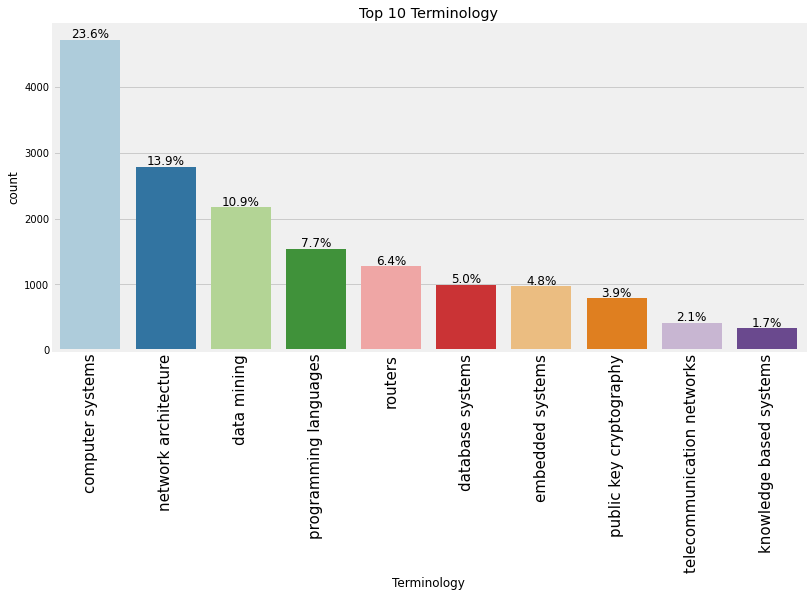

In [36]:
labeled_barplot(final_dataset, "Terminology", perc=True, n=10, title="Top 10 Terminology")

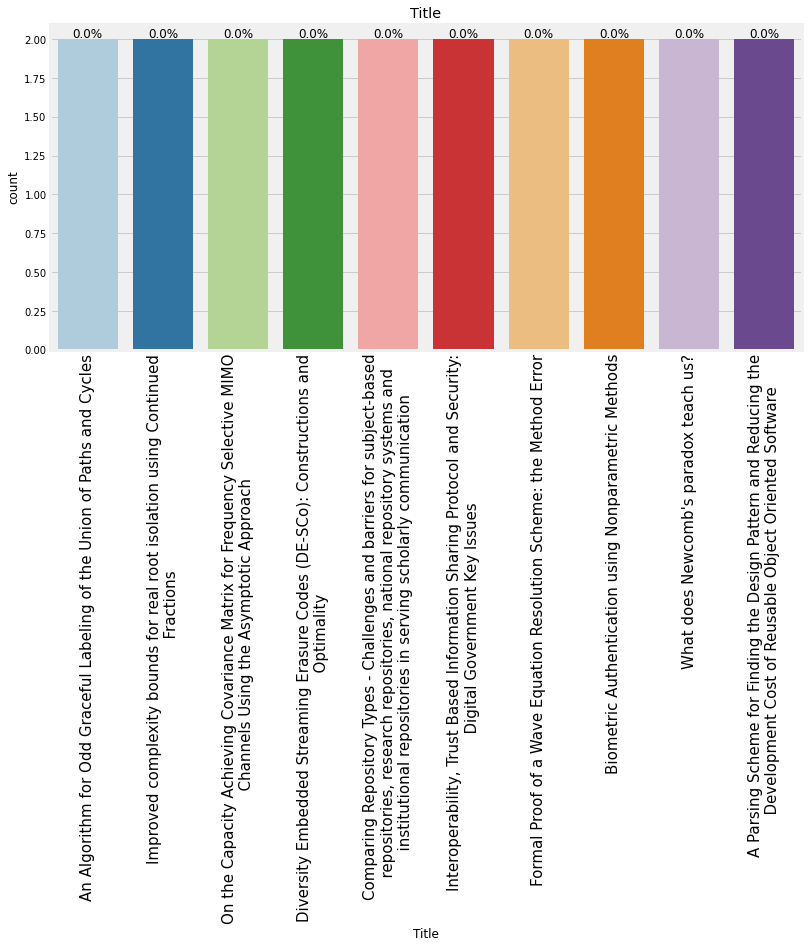

In [37]:
labeled_barplot(final_dataset, "Title", perc=True, n=10, title="Title")

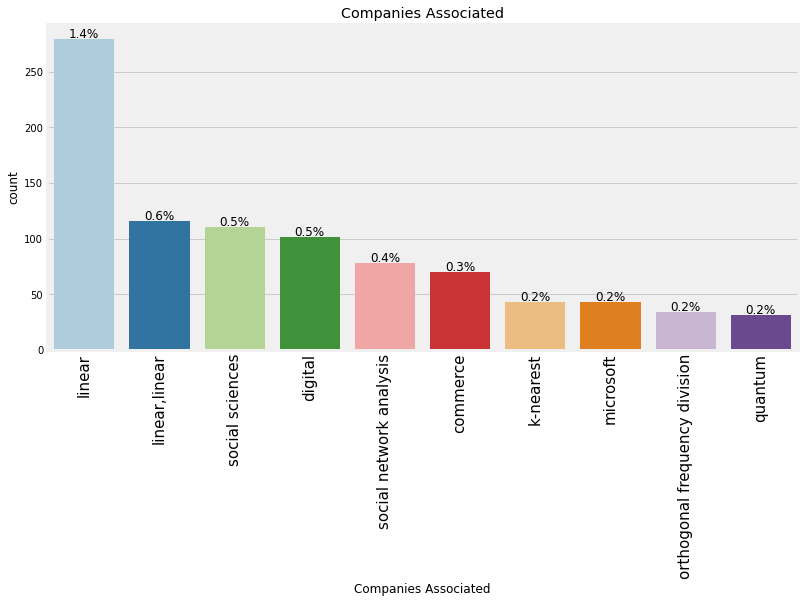

In [38]:
labeled_barplot(final_dataset, "Companies Associated", perc=True, n=10, title="Companies Associated")

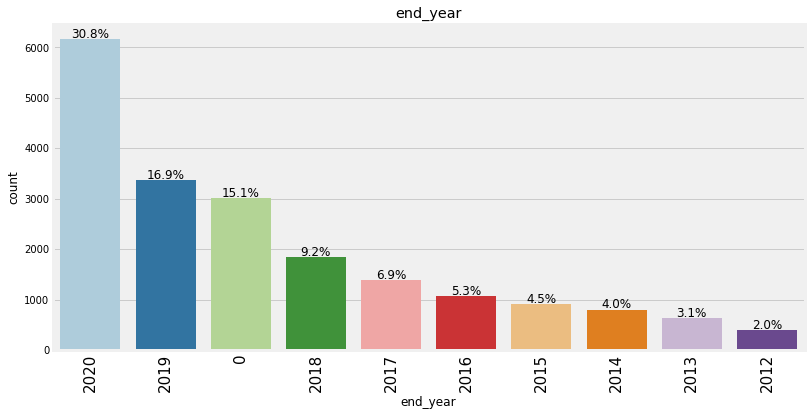

In [39]:
labeled_barplot(final_dataset, "end_year", perc=True, n=10, title="end_year")

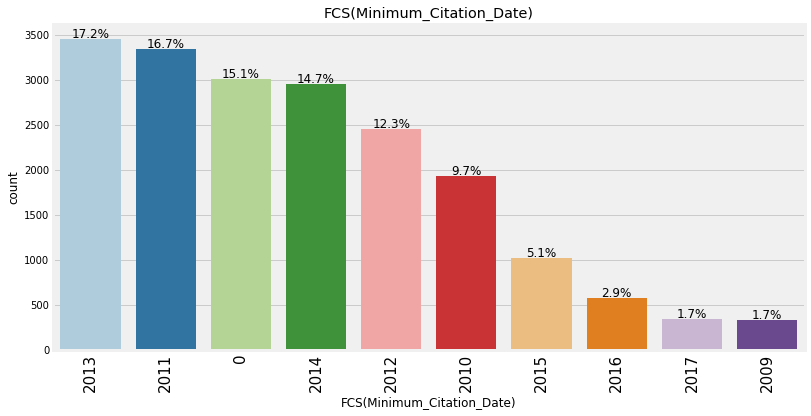

In [40]:
labeled_barplot(final_dataset, "FCS(Minimum_Citation_Date)", perc=True, n=10, title="FCS(Minimum_Citation_Date)")

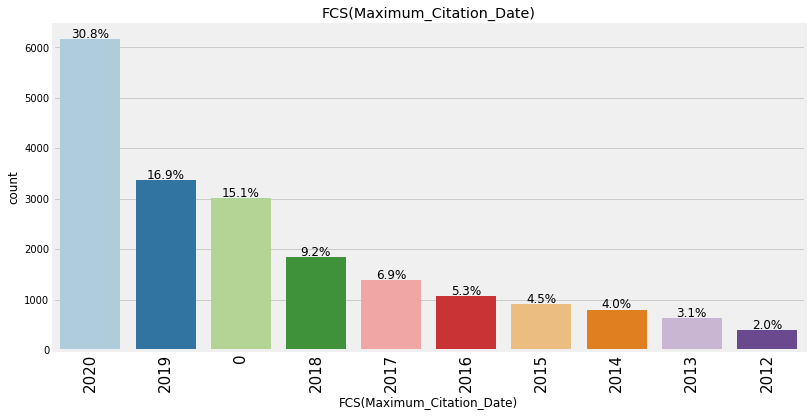

In [41]:
labeled_barplot(final_dataset, "FCS(Maximum_Citation_Date)", perc=True, n=10, title="FCS(Maximum_Citation_Date)")

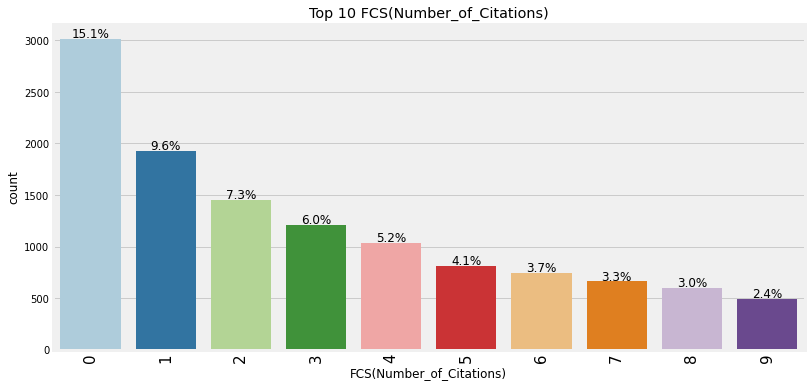

In [42]:
labeled_barplot(final_dataset, "FCS(Number_of_Citations)", perc=True, n=10, title="Top 10 FCS(Number_of_Citations)")

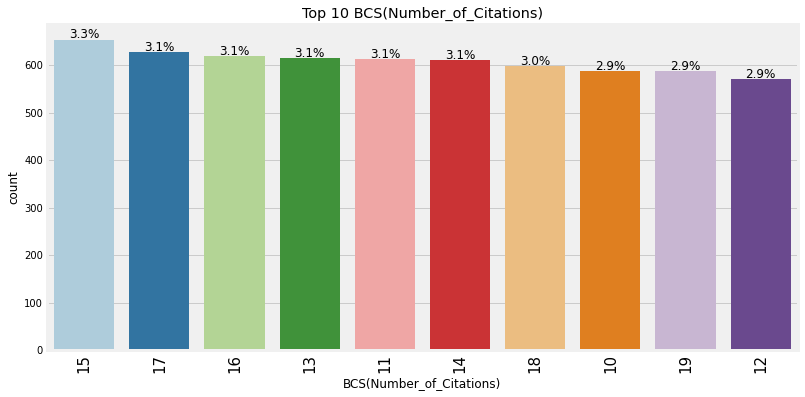

In [43]:
labeled_barplot(final_dataset, "BCS(Number_of_Citations)", perc=True, n=10, title="Top 10 BCS(Number_of_Citations)")

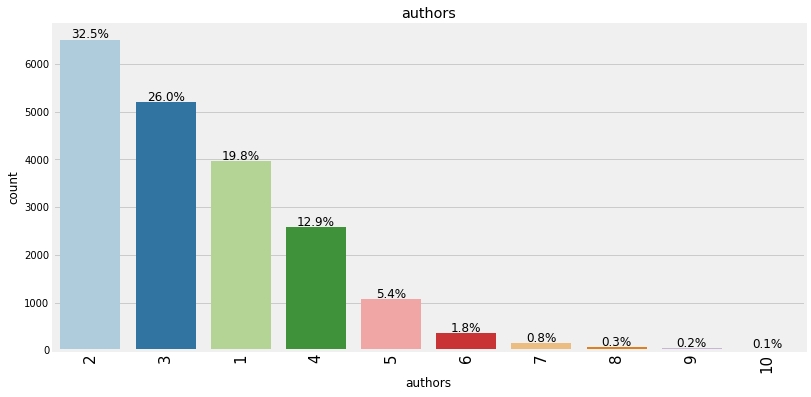

In [44]:
labeled_barplot(final_dataset, "authors", perc=True, n=10, title="authors")

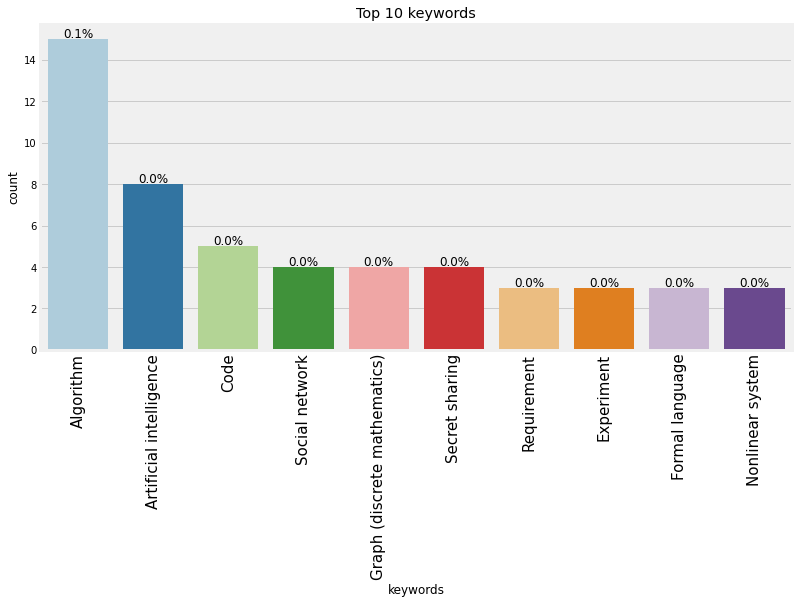

In [45]:
labeled_barplot(final_dataset, "keywords", perc=True, n=10, title="Top 10 keywords")

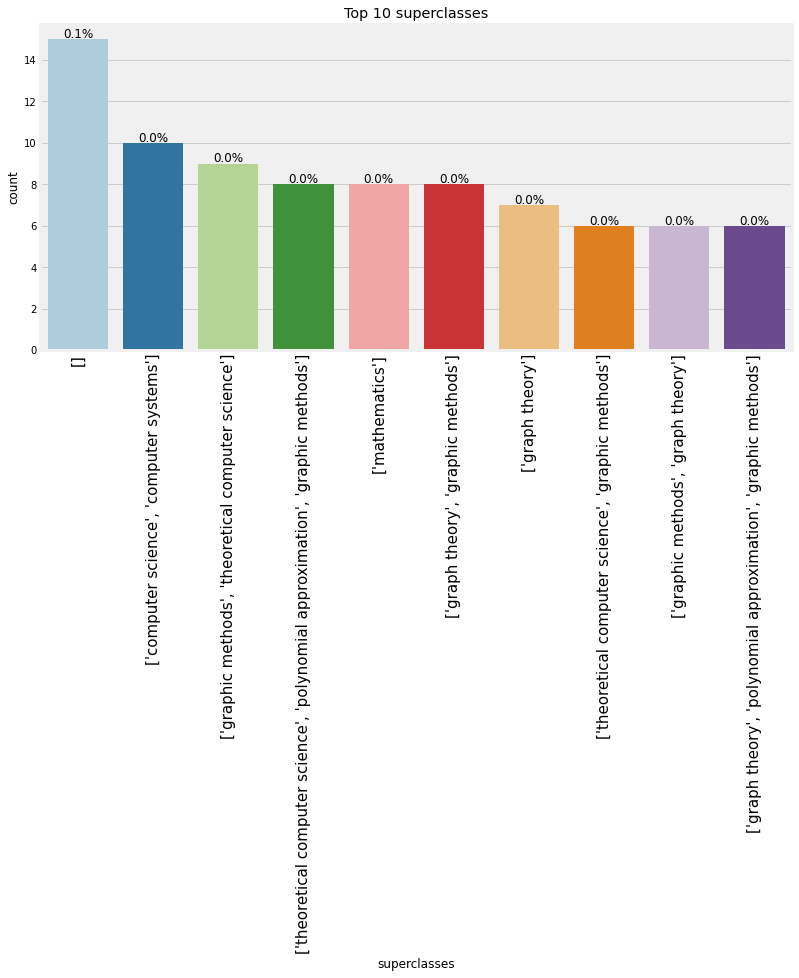

In [46]:
labeled_barplot(final_dataset, "superclasses", perc=True, n=10, title="Top 10 superclasses")

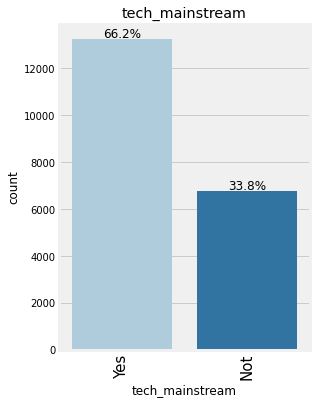

In [47]:
labeled_barplot(final_dataset, "tech_mainstream", perc=True, n=2, title="tech_mainstream")

In [30]:
final_dataset['Years_Since_Publication'] = 2022 - pd.to_datetime(final_dataset['start_year']).dt.year
final_dataset['Years_Since_Publication_FCS_Minimum_Citation_Date'] = 2022 - final_dataset['FCS(Minimum_Citation_Date)']
final_dataset['Years_Since_Publication_FCS_Maximum_Citation_Date'] = 2022 - final_dataset['FCS(Maximum_Citation_Date)']
final_dataset['Years_Since_Publication_BCS_Minimum_Citation_Date'] = 2022 - final_dataset['BCS(Minimum_Citation_Date)']
final_dataset['Years_Since_Publication_BCS_Maximum_Citation_Date'] = 2022 - final_dataset['BCS(Maximum_Citation_Date)']

final_dataset.shape

(20012, 44)

In [31]:
final_dataset.head(5)

,Unnamed: 0,Terminology,Title,Companies Associated,start_year,end_year,FCS(Minimum_Citation_Date),FCS(Maximum_Citation_Date),FCS(Average_Citation_Date),FCS(Number_of_Citations),...,Superclass_Computer Science,Superclass_Computer Systems,Superclass_Graph Theory,Superclass_Mathematics,Superclass_Other,Years_Since_Publication,Years_Since_Publication_FCS_Minimum_Citation_Date,Years_Since_Publication_FCS_Maximum_Citation_Date,Years_Since_Publication_BCS_Minimum_Citation_Date,Years_Since_Publication_BCS_Maximum_Citation_Date
0,0,adaptive systems,On-line Viterbi Algorithm and Its Relationship...,"Zipf,Small-World",3/31/2007,2019,2007,2019,2013.933333,15,...,1,1,1,1,1,15,15,3,49,15
1,1,adaptive systems,The Cyborg Astrobiologist: Porting from a wear...,NaN,7/5/2007,2013,2009,2013,2010.666667,3,...,1,1,1,1,1,15,13,9,26,16
2,2,adaptive systems,Algorithmic Arithmetic Fewnomial Theory I: One...,NaN,11/16/2007,2009,2009,2009,2009.000000,1,...,1,1,1,1,1,15,13,13,53,16
3,3,adaptive systems,Instruction sequences with dynamically instant...,"Artifi,AIS,AIS,AIS,AIS,DCA,simulation environ-...",11/27/2007,2013,2007,2013,2009.272727,22,...,1,1,1,1,1,15,15,9,34,12
4,4,adaptive systems,On the Monotonicity of the Generalized Marcum ...,NaN,12/26/2007,2020,2008,2020,2014.426667,75,...,1,1,1,1,1,15,14,2,123,12


In [32]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20012 entries, 0 to 20011
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         20012 non-null  int64  
 1   Terminology                                        20012 non-null  object 
 2   Title                                              20012 non-null  object 
 3   Companies Associated                               2607 non-null   object 
 4   start_year                                         20012 non-null  object 
 5   end_year                                           20012 non-null  int64  
 6   FCS(Minimum_Citation_Date)                         20012 non-null  int64  
 7   FCS(Maximum_Citation_Date)                         20012 non-null  int64  
 8   FCS(Average_Citation_Date)                         20012 non-null  float64
 9   FCS(Nu

In [33]:
final_dataset.shape

(20012, 44)

In [34]:
final_dataset = final_dataset.drop_duplicates()
final_dataset.shape

(20012, 44)

## TF-IDF Features for Title

In [37]:
stop_words=['of', 'and', 'the', 'by', 'from', 'as', 'is', 'in', 'for', 'an', 'based', 'approach', 'using']

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(max_features=200, stop_words='english')
x = v.fit_transform(final_dataset['Title'].str.lower())

In [41]:
tf_idf_features_title = pd.DataFrame(data=x.toarray(), columns=v.get_feature_names())

del x
del v

## TF-IDF Features for Keywords

In [43]:
v1 = TfidfVectorizer(max_features=100, stop_words='english')
x1 = v1.fit_transform(final_dataset['keywords'].str.lower().fillna(""))
tf_idf_features_keyword = pd.DataFrame(data=x1.toarray(), columns=v1.get_feature_names())

del x1
del v1

## TF-IDF Features for SuperClass

In [44]:
v2 = TfidfVectorizer(max_features=100, stop_words='english')
x2 = v2.fit_transform(final_dataset['superclasses'].str.lower().fillna(""))
tf_idf_features_superclass = pd.DataFrame(data=x2.toarray(), columns=v2.get_feature_names())

del x2
del v2

## Other Features

In [45]:
final_dataset.columns

Index(['Unnamed: 0', 'Terminology', 'Title', 'Companies Associated',
       'start_year', 'end_year', 'FCS(Minimum_Citation_Date)',
       'FCS(Maximum_Citation_Date)', 'FCS(Average_Citation_Date)',
       'FCS(Number_of_Citations)', 'BCS(Minimum_Citation_Date)',
       'BCS(Maximum_Citation_Date)', 'BCS(Average_Citation_Date)',
       'BCS(Number_of_Citations)', 'authors', 'keywords', 'superclasses',
       'tech_mainstream', 'Term_x', 'Company_Commerce', 'Company_Digital',
       'Company_Linear', 'Company_Microsoft', 'Company_Other',
       'Company_Social Sciences', 'Term_y', 'Keyword_Algorithm',
       'Keyword_Computation', 'Keyword_Experiment', 'Keyword_Other',
       'Keyword_Simulation', 'Keyword_Time complexity', 'Term',
       'Superclass_Computer Networks', 'Superclass_Computer Science',
       'Superclass_Computer Systems', 'Superclass_Graph Theory',
       'Superclass_Mathematics', 'Superclass_Other', 'Years_Since_Publication',
       'Years_Since_Publication_FCS_Minimum_

## Machine Learning Classifications

In [35]:
def trainMachineLearningALgorithmClass(X_train, X_test, y_train, y_test, algo="RF", X=None):    

    print("Machine Learning Training Started")
    # make Random Forest Classifier object
    if algo == "RF":
        forest = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=3)
    elif algo == "XG":
        forest = GradientBoostingClassifier(n_estimators=500)
    elif algo == "KNN":
        forest = KNeighborsClassifier(n_neighbors=5)
    else:
        forest = LogisticRegression()
    
    # Train Algo on training data
    forest.fit(X_train, y_train)
    
    print("-------------------------------")
    print('Training Data Performance')
    print("-------------------------------")
    
    # Predict target for testing data
    y_pred = forest.predict(X_train)
    print("Classification Report")
    confusion_report = classification_report(y_train, y_pred)
    print(confusion_report)
    
    print("\nConfusion Matrix")
    confusion_attack = confusion_matrix(y_train, y_pred)
    print(confusion_attack) 
    print("-------------------------------\n\n")
    
    
    print("-------------------------------")
    print('Testing Data Performance')
    print("-------------------------------")
    
    # Predict target for testing data
    y_pred = forest.predict(X_test)
    print("Classification Report")
    confusion_report = classification_report(y_test, y_pred)
    print(confusion_report)
    
    print("\nConfusion Matrix")
    confusion_attack = confusion_matrix(y_test, y_pred)
    print(confusion_attack) 
    print("-------------------------------")
    
    try:
        roc = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
        print("\nROC AUC Score = ", roc)
    except:
        pass
    
    feat_impts = [] 
    
    if algo in ["LR"]:
        feat_impts = forest.coef_
    elif algo == "KNN":
        return
    else:
        feat_impts = forest.feature_importances_
        
    plt.figure(figsize=(18,8))
    
    # calculating features
    # ploting features using
    (pd.Series(np.mean(feat_impts, axis=0), index=X.columns)
           .nlargest(49)
           .plot(kind='bar'))
    plt.show()
    
    return forest

## ML Regression Programe

In [36]:
def trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF", X=None): 
    import math
    import numpy as np
    print("Machine Learning Training Started")
    # make Random Forest Classifier object
    if algo == "RF":
        model = RandomForestRegressor(n_estimators=500, random_state=1, n_jobs=3)
    elif algo == "XG":
        model = GradientBoostingRegressor(n_estimators=5)
    elif algo == "KNN":
        model = KNeighborsRegressor()
    elif algo == "MLP":
        model = MLPRegressor()
    else:
        model = LinearRegression()

    # Train Algo on training data
    model.fit(X_train, y_train)

    # Predict target for testing data
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print('MSE: '+str(mse))
    mae = mean_absolute_error(y_test, y_pred)
    print('MAE: '+str(mae))
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE: '+str(rmse))
    rsqrt = r2_score(y_test, y_pred)
    print('R-Squared: '+str(rsqrt))

    fig = plt.figure(figsize=(16,8))
    a = [i for i in range(len(y_test))]
    L = 0
    H = 300
    plt.plot(a[L:H], y_test[L:H], label='Actual Values')
    plt.plot(a[L:H], y_pred[L:H], label='Predicted Values')
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,8))
    feat_impts = [] 
    # calculating features
    if algo == "LR":
        feat_impts.append(model.coef_)
    elif algo in ["KNN", "MLP"]:
        return y_pred
    else:
        feat_impts.append(model.feature_importances_)
    # ploting features using
    (pd.Series(np.mean(feat_impts, axis=0), index=X)
   .nlargest(49)
   .plot(kind='bar')) 
    
    return y_pred, model

## Model on Title (TF-IDF) Only - Classification

Whether tech will become mainstream or not?

Machine Learning Training Started
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.93      0.65      0.76      3387
         Yes       0.84      0.97      0.91      6619

    accuracy                           0.86     10006
   macro avg       0.89      0.81      0.83     10006
weighted avg       0.87      0.86      0.86     10006


Confusion Matrix
[[2199 1188]
 [ 166 6453]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.33      0.10      0.15      3387
         Yes       0.66      0.90      0.76      6619

    accuracy                           0.63     10006
   macro avg       0.50      0.50      0.46     10006
weighted avg       0.55      0.63      0.56     10006


Confusion

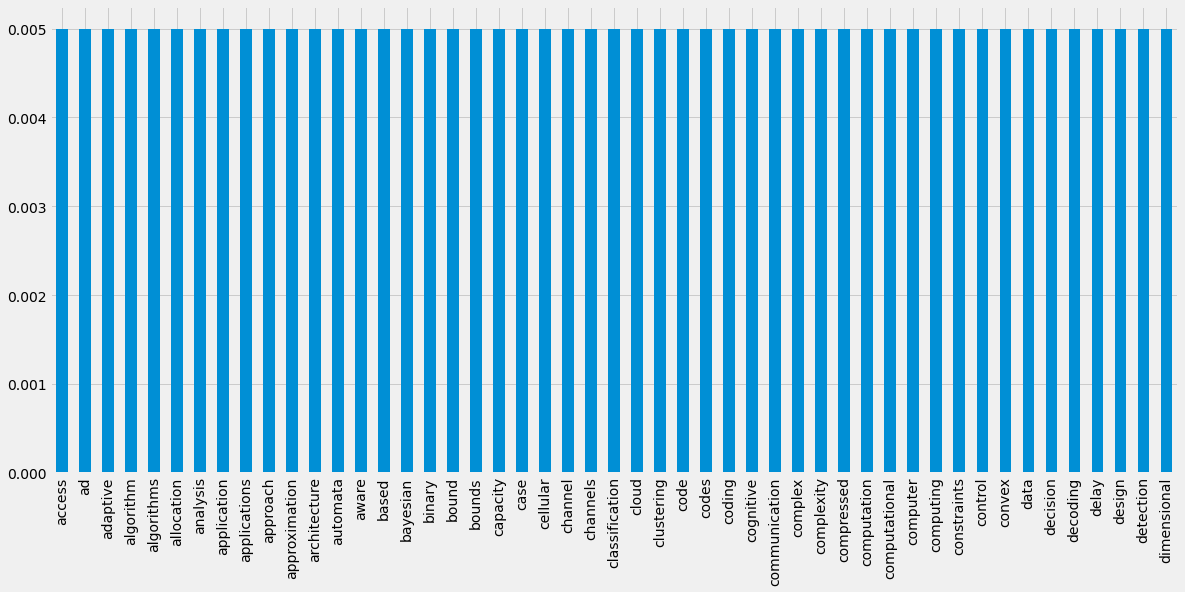

In [48]:
tf_idf_features_title['tech_mainstream'] = final_dataset['tech_mainstream']
X = tf_idf_features_title.drop(columns=['tech_mainstream'])
Y = tf_idf_features_title['tech_mainstream'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, stratify=Y)
trainMachineLearningALgorithmClass(X_train, X_test, y_train, y_test, algo="RF", X=X)

## Model on Title (TF-IDF) Only - Regressor

How many years it takes for technology to become mainstream

Machine Learning Training Started
MSE: 29.33677998464189
MAE: 4.757578394365301
RMSE: 5.416343783830739
R-Squared: -0.09914488547006384


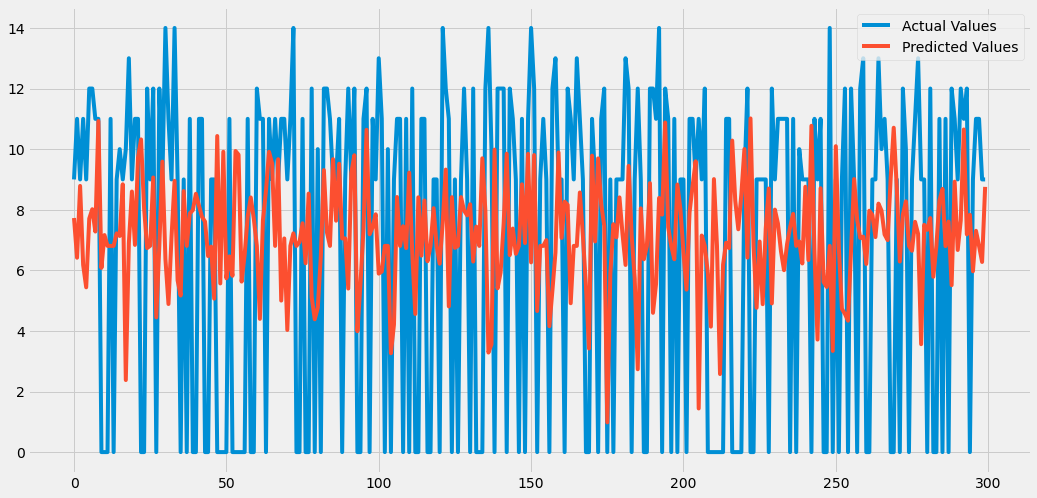

array([ 7.72600564,  6.4155842 ,  8.78560443, ...,  8.2882904 ,
       11.51072381,  7.40058333])

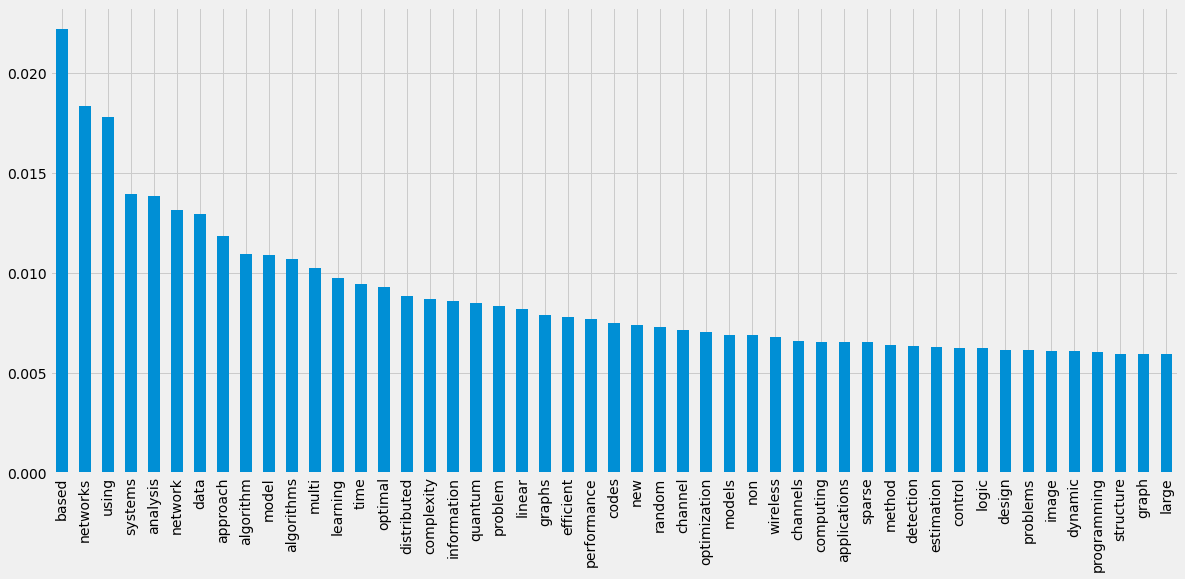

In [49]:
tf_idf_features_title['Years_Since_Publication'] = final_dataset['Years_Since_Publication']
tf_idf_features_title['tech_mainstream'] = final_dataset['tech_mainstream']
tf_idf_features_title['Years_Since_Publication1'] = tf_idf_features_title['Years_Since_Publication']
tf_idf_features_title.loc[tf_idf_features_title['tech_mainstream'] == "Not",  "Years_Since_Publication1"] = 0

X = tf_idf_features_title.drop(columns=['tech_mainstream', 'Years_Since_Publication', 'Years_Since_Publication1'])
Y = tf_idf_features_title['Years_Since_Publication1'].values
                          
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF", X=X.columns)

## Model on Keywords (TF-IDF) Only - Classification

Whether tech will become mainstream or not?

Machine Learning Training Started
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.98      0.88      0.93      3387
         Yes       0.94      0.99      0.97      6619

    accuracy                           0.95     10006
   macro avg       0.96      0.94      0.95     10006
weighted avg       0.96      0.95      0.95     10006


Confusion Matrix
[[2979  408]
 [  54 6565]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.36      0.07      0.12      3387
         Yes       0.66      0.94      0.78      6619

    accuracy                           0.64     10006
   macro avg       0.51      0.50      0.45     10006
weighted avg       0.56      0.64      0.55     10006


Confusion

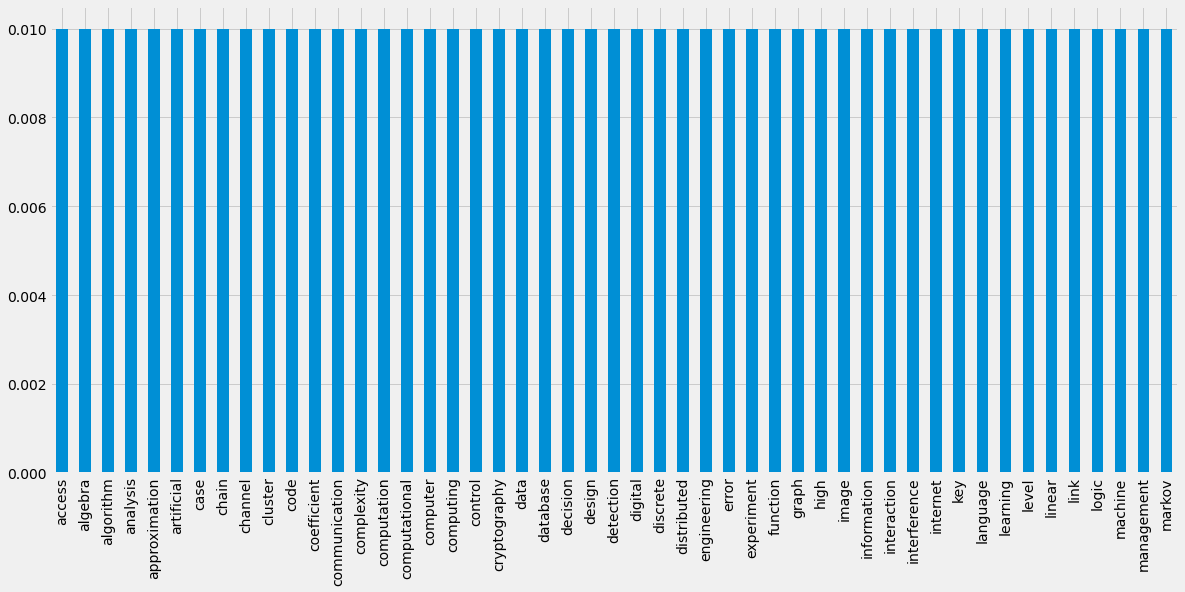

In [50]:
tf_idf_features_keyword['tech_mainstream'] = final_dataset['tech_mainstream']
X = tf_idf_features_keyword.drop(columns=['tech_mainstream'])
Y = tf_idf_features_keyword['tech_mainstream'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, stratify=Y)
trainMachineLearningALgorithmClass(X_train, X_test, y_train, y_test, algo="RF", X=X)

## Model on Keywords (TF-IDF) Only - Regressor

How many years it takes for technology to become mainstream

Machine Learning Training Started
MSE: 27.94529845812719
MAE: 4.727012588421806
RMSE: 5.286331285317559
R-Squared: -0.0523611657375207


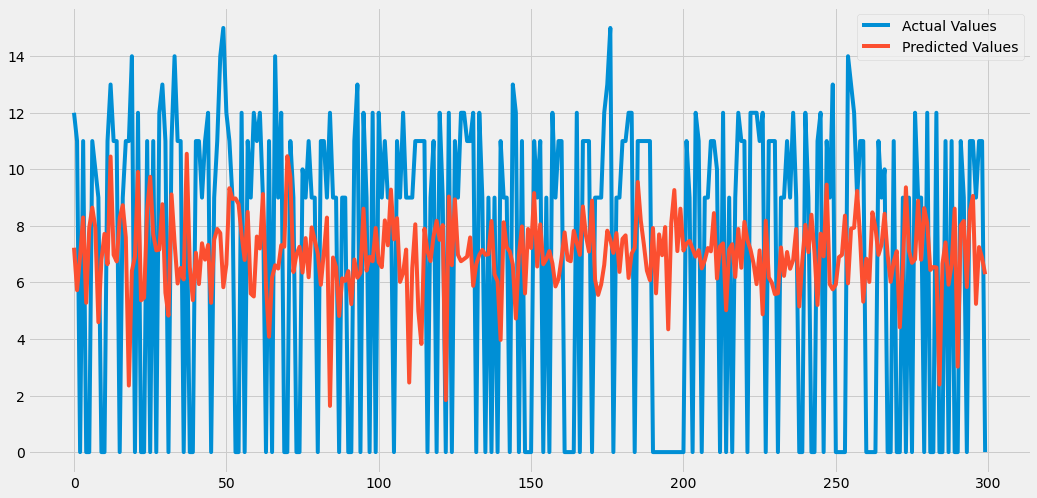

array([7.228     , 5.726     , 6.942     , ..., 7.082     , 8.23060909,
       8.188     ])

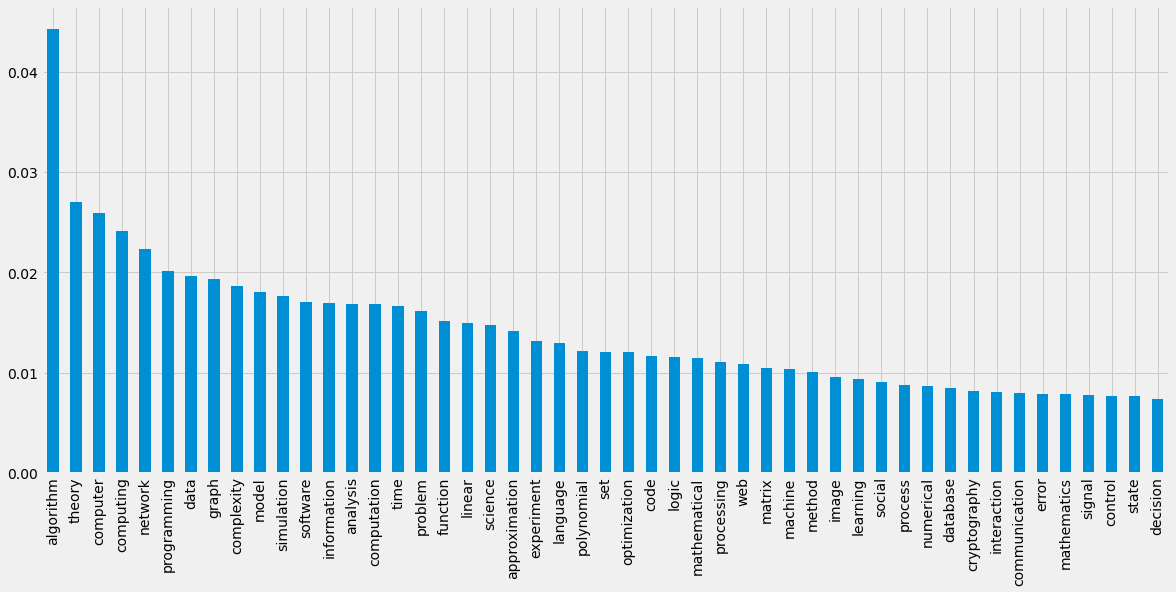

In [51]:
tf_idf_features_keyword['Years_Since_Publication'] = final_dataset['Years_Since_Publication']
tf_idf_features_keyword['tech_mainstream'] = final_dataset['tech_mainstream']
tf_idf_features_keyword['Years_Since_Publication1'] = tf_idf_features_keyword['Years_Since_Publication'].values
tf_idf_features_keyword.loc[tf_idf_features_keyword['tech_mainstream'] == "Not",  "Years_Since_Publication1"] = 0

X = tf_idf_features_keyword.drop(columns=['tech_mainstream', 'Years_Since_Publication', 'Years_Since_Publication1'])
Y = tf_idf_features_keyword['Years_Since_Publication1'].values
                          
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF", X=X.columns)

## Model on SuperClass (TF-IDF) Only - Classification

Whether tech will become mainstream or not?

Machine Learning Training Started
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.99      0.97      0.98      3387
         Yes       0.98      0.99      0.99      6619

    accuracy                           0.98     10006
   macro avg       0.99      0.98      0.98     10006
weighted avg       0.98      0.98      0.98     10006


Confusion Matrix
[[3271  116]
 [  41 6578]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.37      0.08      0.14      3387
         Yes       0.66      0.93      0.77      6619

    accuracy                           0.64     10006
   macro avg       0.52      0.51      0.46     10006
weighted avg       0.57      0.64      0.56     10006


Confusion

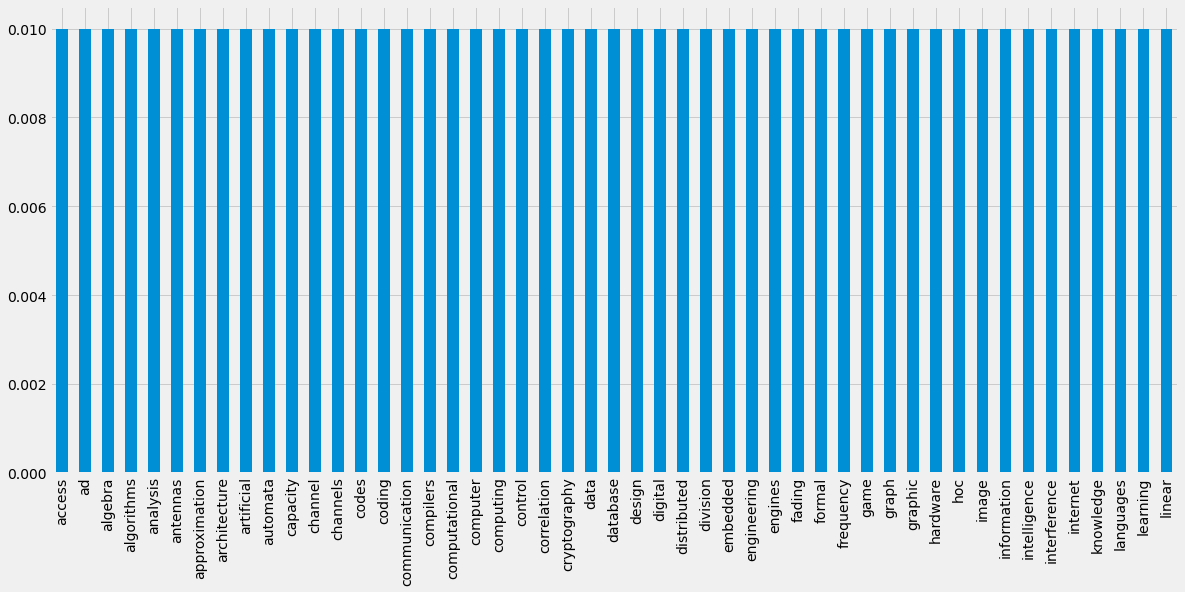

In [52]:
tf_idf_features_superclass['tech_mainstream'] = final_dataset['tech_mainstream']
X = tf_idf_features_superclass.drop(columns=['tech_mainstream'])
Y = tf_idf_features_superclass['tech_mainstream'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, stratify=Y)
trainMachineLearningALgorithmClass(X_train, X_test, y_train, y_test, algo="RF", X=X)

## Model on SuperClass (TF-IDF) Only - Regressor

How many years it takes for technology to become mainstream

Machine Learning Training Started
MSE: 28.01156398077988
MAE: 4.7730315847522045
RMSE: 5.292595202807398
R-Squared: -0.05912508032863961


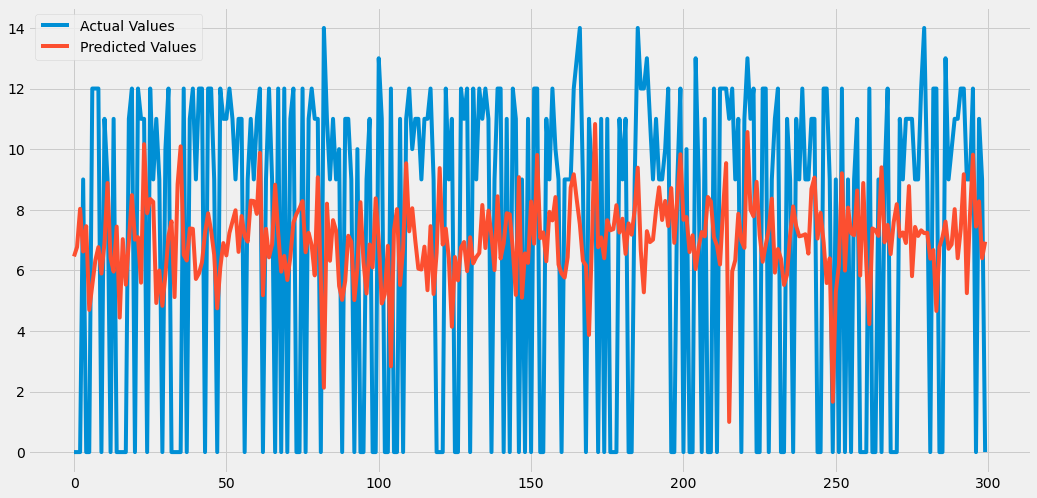

array([6.458     , 6.76866667, 8.03      , ..., 9.648     , 7.27      ,
       6.672     ])

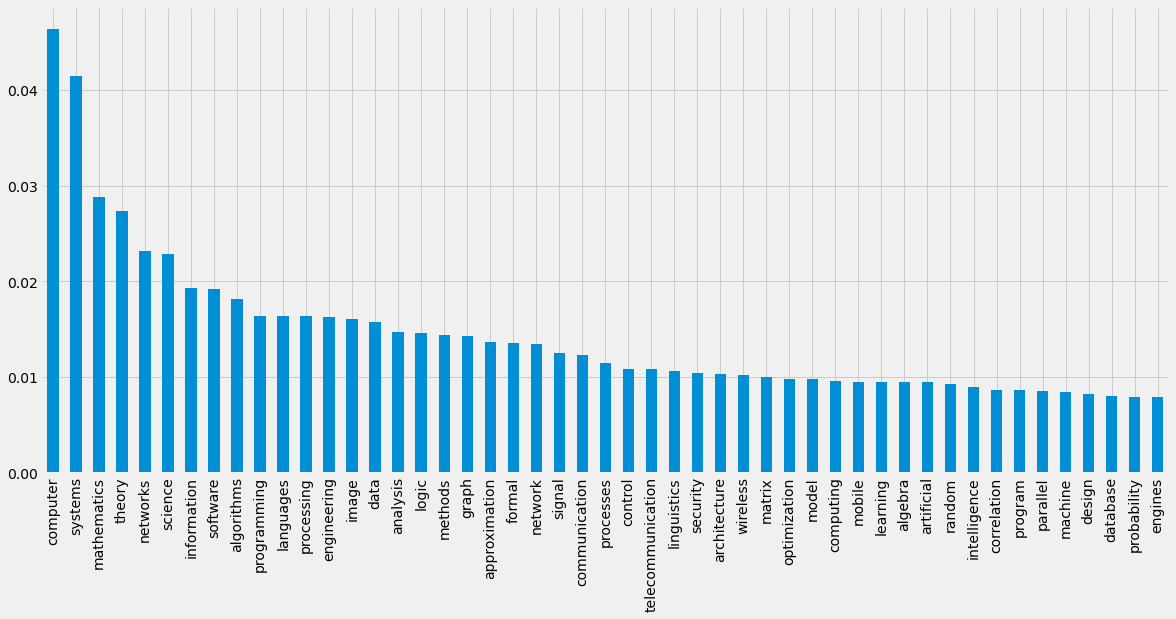

In [53]:
tf_idf_features_superclass['Years_Since_Publication'] = final_dataset['Years_Since_Publication']
tf_idf_features_superclass['tech_mainstream'] = final_dataset['tech_mainstream']
tf_idf_features_superclass['Years_Since_Publication1'] = tf_idf_features_superclass['Years_Since_Publication']
tf_idf_features_superclass.loc[tf_idf_features_superclass['tech_mainstream'] == "Not",  "Years_Since_Publication1"] = 0

X = tf_idf_features_superclass.drop(columns=['tech_mainstream', 'Years_Since_Publication', 'Years_Since_Publication1'])
Y = tf_idf_features_superclass['Years_Since_Publication1'].values
                          
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF", X=X.columns)

## Model on Other Features Only - Classification

Whether tech will become mainstream or not?

Machine Learning Training Started
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       1.00      0.99      1.00      3387
         Yes       1.00      1.00      1.00      6619

    accuracy                           1.00     10006
   macro avg       1.00      1.00      1.00     10006
weighted avg       1.00      1.00      1.00     10006


Confusion Matrix
[[3365   22]
 [   6 6613]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.68      0.46      0.55      3387
         Yes       0.76      0.89      0.82      6619

    accuracy                           0.74     10006
   macro avg       0.72      0.67      0.69     10006
weighted avg       0.74      0.74      0.73     10006


Confusion

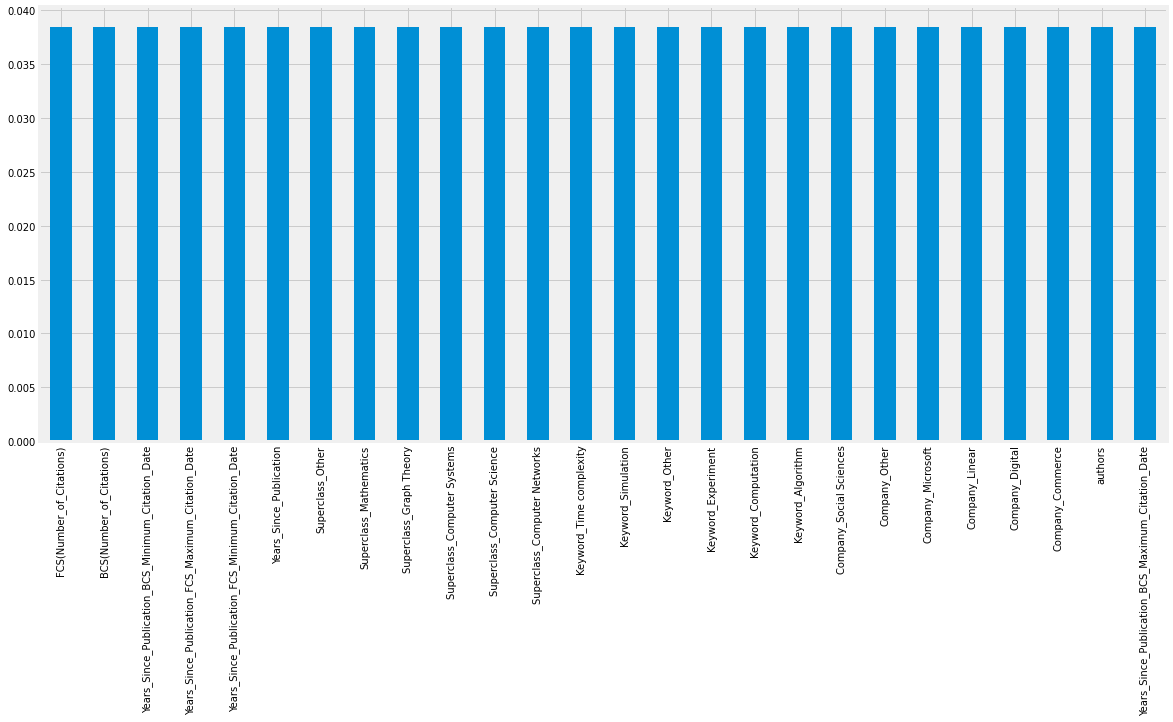

In [42]:
drop_columns = ['Unnamed: 0', 'Terminology', 'Title', 'Companies Associated','start_year', 'end_year',\
                'FCS(Minimum_Citation_Date)','FCS(Maximum_Citation_Date)', 'FCS(Average_Citation_Date)',\
                'BCS(Minimum_Citation_Date)','BCS(Maximum_Citation_Date)', 'BCS(Average_Citation_Date)',\
                'keywords', 'superclasses','tech_mainstream', 'Term_x', 'Term_y','Term', 'Years_Since_Publication1']

X = final_dataset.fillna(0).drop(columns=drop_columns)
Y = final_dataset['tech_mainstream'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, stratify=Y)
model  = trainMachineLearningALgorithmClass(X_train, X_test, y_train, y_test, algo="RF", X=X)

## Model on Other Features Only - Regressor

How many years it takes for technology to become mainstream

Machine Learning Training Started
MSE: 21.200893195422786
MAE: 3.6606182666881755
RMSE: 4.604442767091669
R-Squared: 0.20530983710596118


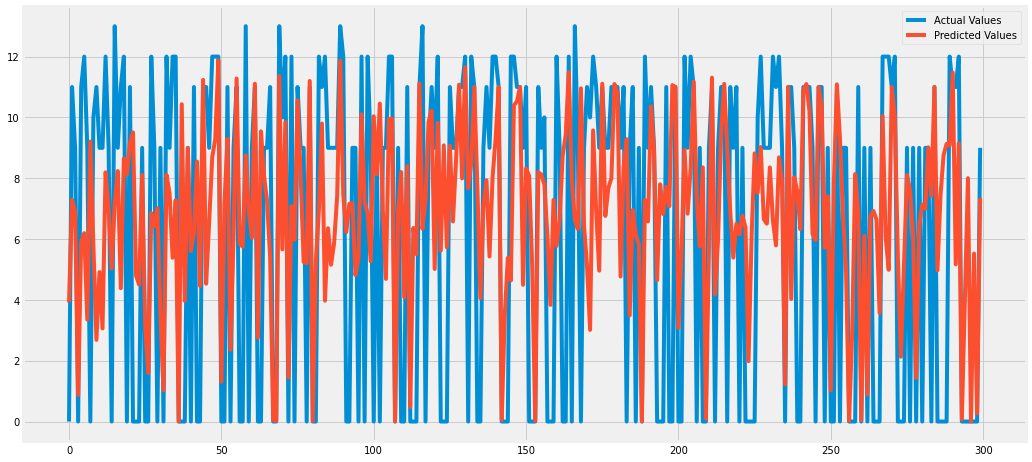

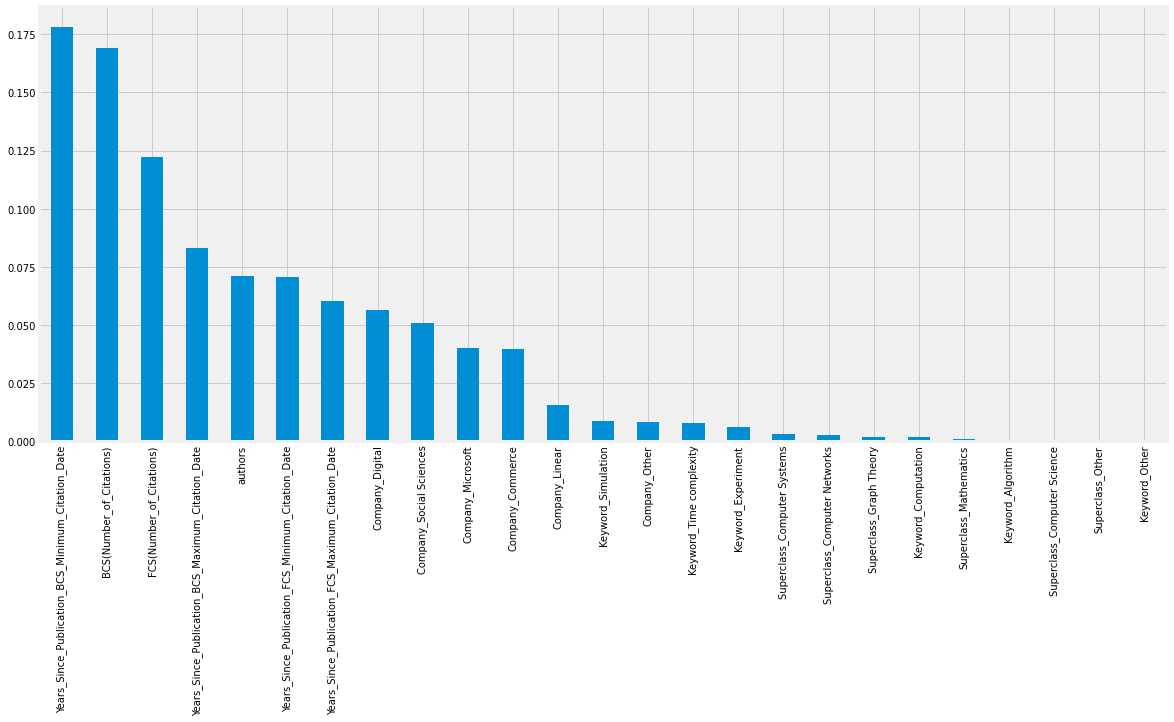

In [38]:
d_columns = drop_columns
final_dataset['Years_Since_Publication1'] = final_dataset['Years_Since_Publication'].values
final_dataset.loc[final_dataset['tech_mainstream'] == "Not",  "Years_Since_Publication1"] = 0
d_columns.append("Years_Since_Publication1")
d_columns.append("Years_Since_Publication")
X = final_dataset.fillna(0).drop(columns=d_columns)
Y = final_dataset['Years_Since_Publication1'].values
                          
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
y_p, reg_model = trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF", X=X.columns)

## Conclusion


Using only non textual features, have good performance.


## Model without looking into FCS features, because we dont know the future

In [39]:
final_dataset.columns

Index(['Unnamed: 0', 'Terminology', 'Title', 'Companies Associated',
       'start_year', 'end_year', 'FCS(Minimum_Citation_Date)',
       'FCS(Maximum_Citation_Date)', 'FCS(Average_Citation_Date)',
       'FCS(Number_of_Citations)', 'BCS(Minimum_Citation_Date)',
       'BCS(Maximum_Citation_Date)', 'BCS(Average_Citation_Date)',
       'BCS(Number_of_Citations)', 'authors', 'keywords', 'superclasses',
       'tech_mainstream', 'Term_x', 'Company_Commerce', 'Company_Digital',
       'Company_Linear', 'Company_Microsoft', 'Company_Other',
       'Company_Social Sciences', 'Term_y', 'Keyword_Algorithm',
       'Keyword_Computation', 'Keyword_Experiment', 'Keyword_Other',
       'Keyword_Simulation', 'Keyword_Time complexity', 'Term',
       'Superclass_Computer Networks', 'Superclass_Computer Science',
       'Superclass_Computer Systems', 'Superclass_Graph Theory',
       'Superclass_Mathematics', 'Superclass_Other', 'Years_Since_Publication',
       'Years_Since_Publication_FCS_Minimum_

## Classification

Machine Learning Training Started
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.99      0.96      0.97      3387
         Yes       0.98      0.99      0.99      6619

    accuracy                           0.98     10006
   macro avg       0.98      0.98      0.98     10006
weighted avg       0.98      0.98      0.98     10006


Confusion Matrix
[[3253  134]
 [  48 6571]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.43      0.29      0.34      3387
         Yes       0.69      0.80      0.74      6619

    accuracy                           0.63     10006
   macro avg       0.56      0.54      0.54     10006
weighted avg       0.60      0.63      0.61     10006


Confusion

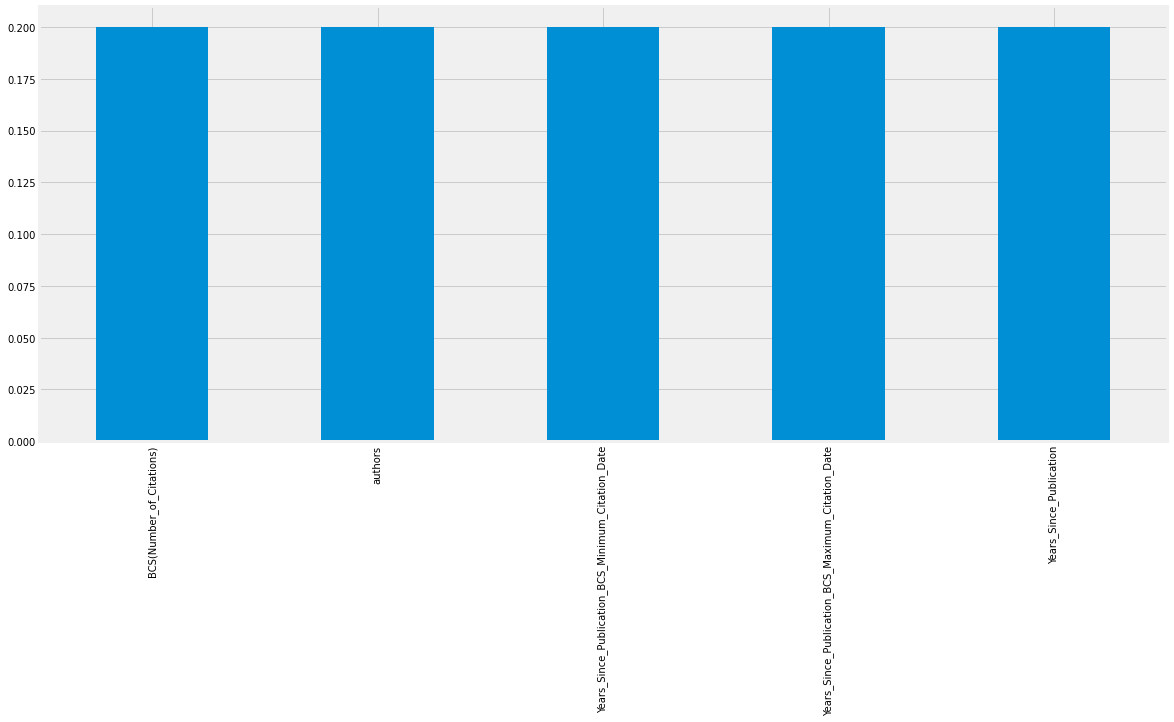

In [40]:
features = ['BCS(Number_of_Citations)', 'authors', 'Years_Since_Publication_BCS_Minimum_Citation_Date', 'Years_Since_Publication_BCS_Maximum_Citation_Date', 'Years_Since_Publication']
X = final_dataset[features]
Y = final_dataset['tech_mainstream'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, stratify=Y)
trainMachineLearningALgorithmClass(X_train, X_test, y_train, y_test, algo="RF", X=X)

## Regression

Machine Learning Training Started
MSE: 27.92618572294174
MAE: 4.531009917214868
RMSE: 5.284523225698013
R-Squared: -0.044797940884397036


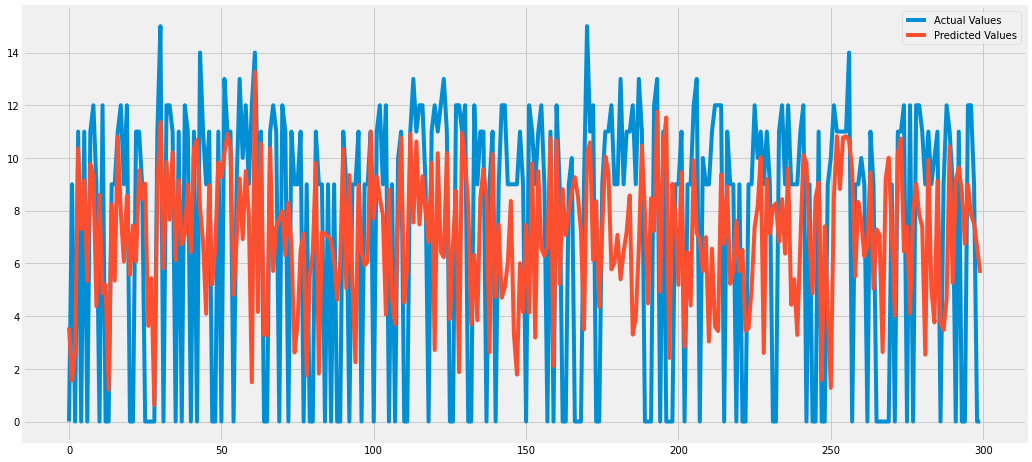

array([3.564     , 1.5471    , 2.67666667, ..., 1.836     , 6.948     ,
       8.4224    ])

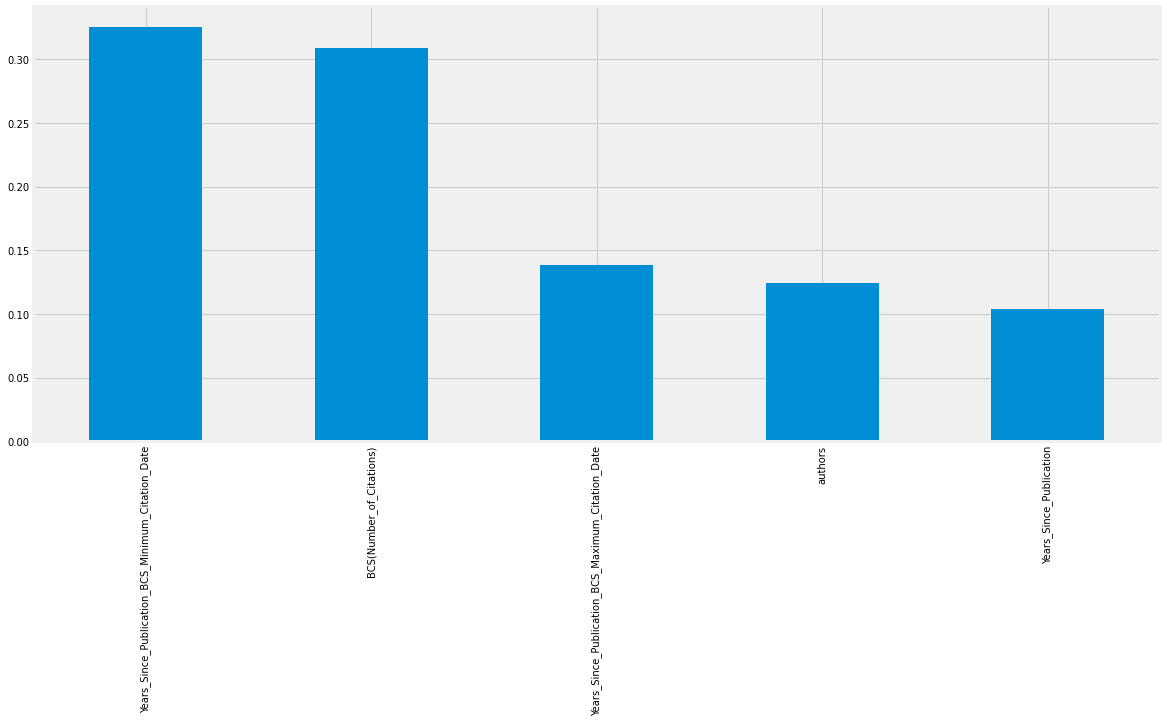

In [42]:
final_dataset['Years_Since_Publication1'] = final_dataset['Years_Since_Publication'].values
final_dataset.loc[final_dataset['tech_mainstream'] == "Not",  "Years_Since_Publication1"] = 0
X = final_dataset[features]
Y = final_dataset['Years_Since_Publication1'].values                          
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF", X=X.columns)

## Use All Features

In [59]:
all_data = tf_idf_features_title
all_data[tf_idf_features_keyword.columns] = tf_idf_features_keyword.values
all_data[tf_idf_features_superclass.columns] = tf_idf_features_superclass.values
all_data[features] = final_dataset[features].values

Machine Learning Training Started
-------------------------------
Training Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       1.00      1.00      1.00      4064
         Yes       1.00      1.00      1.00      7943

    accuracy                           1.00     12007
   macro avg       1.00      1.00      1.00     12007
weighted avg       1.00      1.00      1.00     12007


Confusion Matrix
[[4060    4]
 [   0 7943]]
-------------------------------


-------------------------------
Testing Data Performance
-------------------------------
Classification Report
              precision    recall  f1-score   support

         Not       0.47      0.08      0.14      2710
         Yes       0.67      0.95      0.79      5295

    accuracy                           0.66      8005
   macro avg       0.57      0.52      0.46      8005
weighted avg       0.60      0.66      0.57      8005


Confusion

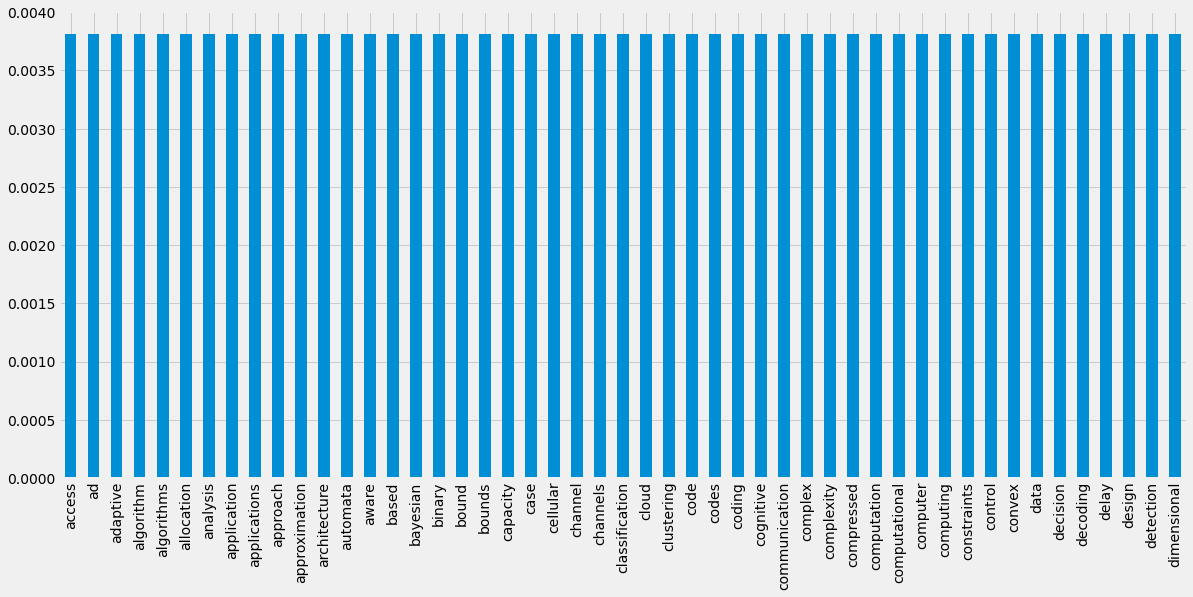

In [60]:
X = all_data.fillna(0).drop(columns=['tech_mainstream', 'Years_Since_Publication1'])
Y = all_data['tech_mainstream'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, stratify=Y)
trainMachineLearningALgorithmClass(X_train, X_test, y_train, y_test, algo="RF", X=X)

Machine Learning Training Started
MSE: 25.229492863353745
MAE: 4.4567428753846645
RMSE: 5.022896859716885
R-Squared: 0.038562163779391256


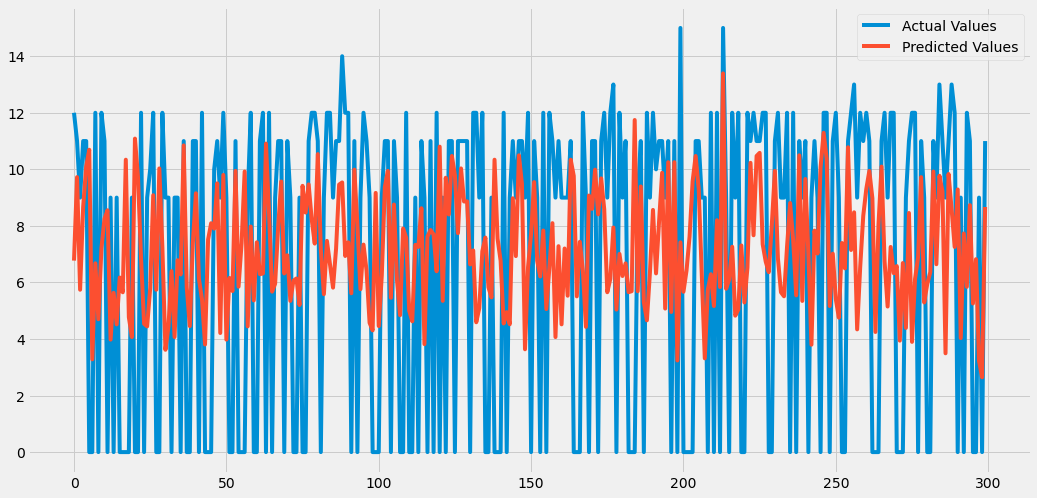

array([6.772, 9.724, 5.742, ..., 7.854, 8.668, 5.328])

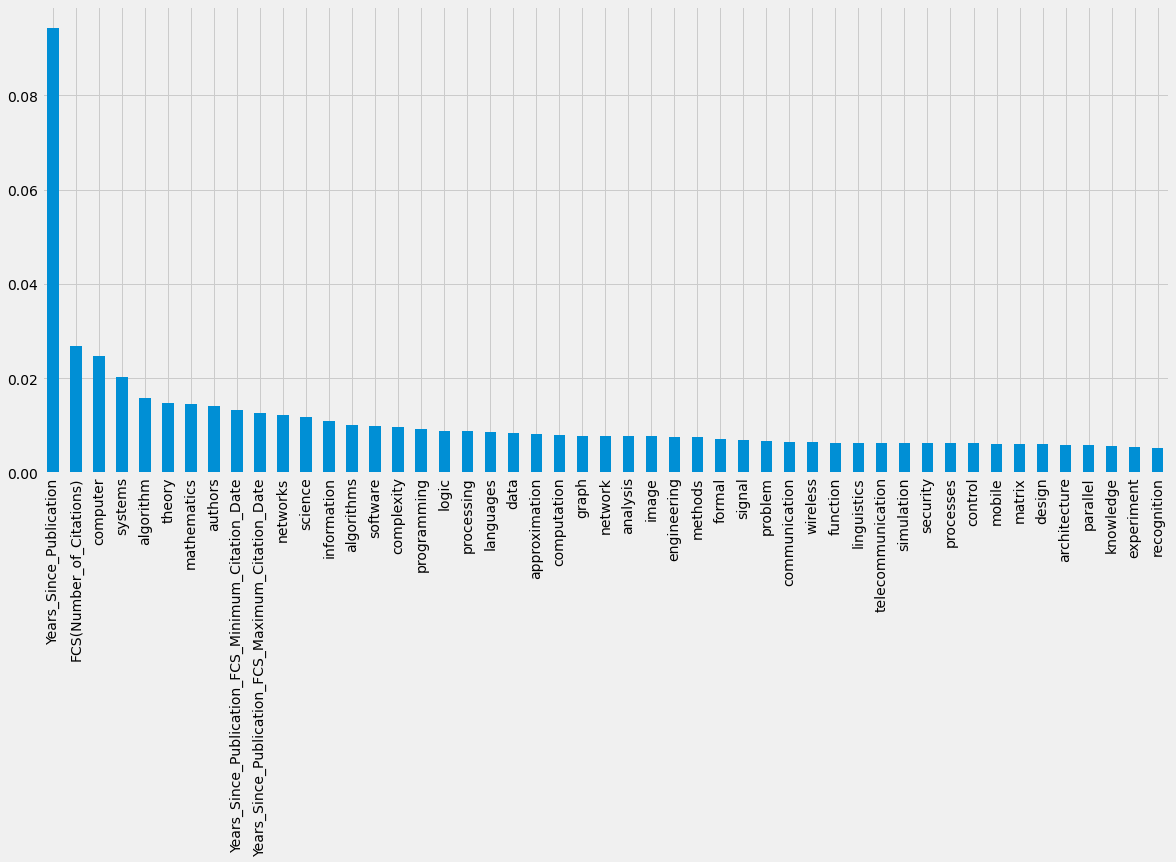

In [61]:
X = all_data.fillna(0).drop(columns=['tech_mainstream', 'Years_Since_Publication1'])
Y = all_data['Years_Since_Publication1'].values                          
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
trainMachineLearningALgorithm(X_train, X_test, y_train, y_test, algo="RF", X=X.columns)

## Future Prediction

In [185]:
temp_data = final_dataset[final_dataset['tech_mainstream'] == "Not"]
drop_columns = ['Unnamed: 0', 'Companies Associated', 'end_year',\
                'FCS(Minimum_Citation_Date)','FCS(Maximum_Citation_Date)', 'FCS(Average_Citation_Date)',\
                'BCS(Minimum_Citation_Date)','BCS(Maximum_Citation_Date)', 'BCS(Average_Citation_Date)',\
                'keywords', 'superclasses','tech_mainstream', 'Term_x', 'Term_y','Term', 'Years_Since_Publication1']

temp_data = temp_data.fillna(0).drop(columns=drop_columns)

In [186]:
temp_data.columns

Index(['Terminology', 'Title', 'start_year', 'FCS(Number_of_Citations)',
       'BCS(Number_of_Citations)', 'authors', 'Company_Commerce',
       'Company_Digital', 'Company_Linear', 'Company_Microsoft',
       'Company_Other', 'Company_Social Sciences', 'Keyword_Algorithm',
       'Keyword_Computation', 'Keyword_Experiment', 'Keyword_Other',
       'Keyword_Simulation', 'Keyword_Time complexity',
       'Superclass_Computer Networks', 'Superclass_Computer Science',
       'Superclass_Computer Systems', 'Superclass_Graph Theory',
       'Superclass_Mathematics', 'Superclass_Other', 'Years_Since_Publication',
       'Years_Since_Publication_FCS_Minimum_Citation_Date',
       'Years_Since_Publication_FCS_Maximum_Citation_Date',
       'Years_Since_Publication_BCS_Minimum_Citation_Date',
       'Years_Since_Publication_BCS_Maximum_Citation_Date'],
      dtype='object')

In [187]:
results = temp_data.copy()

## For simulating as time passes

- Add 1 year to all years columns
- Add random citations to paper each year

## For Current Year 2022

In [189]:
model.predict(temp_data.drop(columns=['Terminology', 'Title', 'start_year']))

array(['Not', 'Not', 'Not', ..., 'Not', 'Not', 'Not'], dtype=object)

In [190]:
res = model.predict_proba(temp_data.drop(columns=['Terminology', 'Title', 'start_year']))[:, 1]

In [191]:
results['Probability to Become Mainstream in 2022'] = res.round(2) * 100
results.head(5)

,Terminology,Title,start_year,FCS(Number_of_Citations),BCS(Number_of_Citations),authors,Company_Commerce,Company_Digital,Company_Linear,Company_Microsoft,...,Superclass_Computer Systems,Superclass_Graph Theory,Superclass_Mathematics,Superclass_Other,Years_Since_Publication,Years_Since_Publication_FCS_Minimum_Citation_Date,Years_Since_Publication_FCS_Maximum_Citation_Date,Years_Since_Publication_BCS_Minimum_Citation_Date,Years_Since_Publication_BCS_Maximum_Citation_Date,Probability to Become Mainstream in 2022
17,routers,A complexity dichotomy for hypergraph partitio...,10/31/2008,13,14,3,1.0,1.0,1.0,1.0,...,1,1,1,1,14,13,7,67,13,8.0
18,routers,Adaptive Uncertainty Resolution in Bayesian Co...,12/4/2008,43,41,2,1.0,1.0,1.0,1.0,...,1,1,1,1,14,12,2,30,12,10.0
19,routers,Efficient Isomorphism Testing for a Class of G...,12/12/2008,22,23,1,1.0,1.0,1.0,1.0,...,1,1,1,1,14,14,2,84,15,20.0
20,routers,A Pseudopolynomial Algorithm for Alexandrov's ...,12/30/2008,19,15,3,1.0,1.0,1.0,1.0,...,1,1,1,1,14,12,2,52,14,7.0
21,routers,Multicasting correlated multi-source to multi-...,1/6/2009,3,27,1,1.0,1.0,1.0,1.0,...,1,1,1,1,13,12,8,53,14,19.0


## For Year 2023

In [192]:
import random
random_citations = random.randint(30, 50)
temp_data_2023 = temp_data.copy()
temp_data_2023['FCS(Number_of_Citations)'] = temp_data_2023['FCS(Number_of_Citations)'] + random_citations
temp_data_2023['Years_Since_Publication'] = temp_data_2023['Years_Since_Publication'] + 1
temp_data_2023['Years_Since_Publication_FCS_Minimum_Citation_Date'] = temp_data_2023['Years_Since_Publication_FCS_Minimum_Citation_Date'] + 1
temp_data_2023['Years_Since_Publication_FCS_Maximum_Citation_Date'] = temp_data_2023['Years_Since_Publication_FCS_Maximum_Citation_Date'] + 1
temp_data_2023['Years_Since_Publication_BCS_Minimum_Citation_Date'] = temp_data_2023['Years_Since_Publication_BCS_Minimum_Citation_Date'] + 1
temp_data_2023['Years_Since_Publication_BCS_Maximum_Citation_Date'] = temp_data_2023['Years_Since_Publication_BCS_Maximum_Citation_Date'] + 1
res = model.predict_proba(temp_data_2023.drop(columns=['Terminology', 'Title', 'start_year']))[:, 1]
results['Probability to Become Mainstream in 2023'] = res.round(2) * 100
results.head(5)

,Terminology,Title,start_year,FCS(Number_of_Citations),BCS(Number_of_Citations),authors,Company_Commerce,Company_Digital,Company_Linear,Company_Microsoft,...,Superclass_Graph Theory,Superclass_Mathematics,Superclass_Other,Years_Since_Publication,Years_Since_Publication_FCS_Minimum_Citation_Date,Years_Since_Publication_FCS_Maximum_Citation_Date,Years_Since_Publication_BCS_Minimum_Citation_Date,Years_Since_Publication_BCS_Maximum_Citation_Date,Probability to Become Mainstream in 2022,Probability to Become Mainstream in 2023
17,routers,A complexity dichotomy for hypergraph partitio...,10/31/2008,13,14,3,1.0,1.0,1.0,1.0,...,1,1,1,14,13,7,67,13,8.0,42.0
18,routers,Adaptive Uncertainty Resolution in Bayesian Co...,12/4/2008,43,41,2,1.0,1.0,1.0,1.0,...,1,1,1,14,12,2,30,12,10.0,54.0
19,routers,Efficient Isomorphism Testing for a Class of G...,12/12/2008,22,23,1,1.0,1.0,1.0,1.0,...,1,1,1,14,14,2,84,15,20.0,51.0
20,routers,A Pseudopolynomial Algorithm for Alexandrov's ...,12/30/2008,19,15,3,1.0,1.0,1.0,1.0,...,1,1,1,14,12,2,52,14,7.0,40.0
21,routers,Multicasting correlated multi-source to multi-...,1/6/2009,3,27,1,1.0,1.0,1.0,1.0,...,1,1,1,13,12,8,53,14,19.0,43.0


## For Year 2024

In [193]:
import random
random_citations = random.randint(30, 50)
temp_data_2024 = temp_data_2023.copy()
temp_data_2024['FCS(Number_of_Citations)'] = temp_data_2024['FCS(Number_of_Citations)'] + random_citations
temp_data_2024['Years_Since_Publication'] = temp_data_2024['Years_Since_Publication'] + 1
temp_data_2024['Years_Since_Publication_FCS_Minimum_Citation_Date'] = temp_data_2024['Years_Since_Publication'] + 1
temp_data_2024['Years_Since_Publication_FCS_Maximum_Citation_Date'] = temp_data_2024['Years_Since_Publication'] + 1
temp_data_2024['Years_Since_Publication_BCS_Minimum_Citation_Date'] = temp_data_2024['Years_Since_Publication'] + 1
temp_data_2024['Years_Since_Publication_BCS_Maximum_Citation_Date'] = temp_data_2024['Years_Since_Publication'] + 1
res = model.predict_proba(temp_data_2024.drop(columns=['Terminology', 'Title', 'start_year']))[:, 1]
results['Probability to Become Mainstream in 2024'] = res.round(2) * 100
results.head(5)

,Terminology,Title,start_year,FCS(Number_of_Citations),BCS(Number_of_Citations),authors,Company_Commerce,Company_Digital,Company_Linear,Company_Microsoft,...,Superclass_Mathematics,Superclass_Other,Years_Since_Publication,Years_Since_Publication_FCS_Minimum_Citation_Date,Years_Since_Publication_FCS_Maximum_Citation_Date,Years_Since_Publication_BCS_Minimum_Citation_Date,Years_Since_Publication_BCS_Maximum_Citation_Date,Probability to Become Mainstream in 2022,Probability to Become Mainstream in 2023,Probability to Become Mainstream in 2024
17,routers,A complexity dichotomy for hypergraph partitio...,10/31/2008,13,14,3,1.0,1.0,1.0,1.0,...,1,1,14,13,7,67,13,8.0,42.0,38.0
18,routers,Adaptive Uncertainty Resolution in Bayesian Co...,12/4/2008,43,41,2,1.0,1.0,1.0,1.0,...,1,1,14,12,2,30,12,10.0,54.0,52.0
19,routers,Efficient Isomorphism Testing for a Class of G...,12/12/2008,22,23,1,1.0,1.0,1.0,1.0,...,1,1,14,14,2,84,15,20.0,51.0,53.0
20,routers,A Pseudopolynomial Algorithm for Alexandrov's ...,12/30/2008,19,15,3,1.0,1.0,1.0,1.0,...,1,1,14,12,2,52,14,7.0,40.0,38.0
21,routers,Multicasting correlated multi-source to multi-...,1/6/2009,3,27,1,1.0,1.0,1.0,1.0,...,1,1,13,12,8,53,14,19.0,43.0,54.0


## For Year 2025

In [194]:
import random
random_citations = random.randint(30, 50)
temp_data_2025 = temp_data_2024.copy()
temp_data_2025['FCS(Number_of_Citations)'] = temp_data_2025['FCS(Number_of_Citations)'] + random_citations
temp_data_2025['Years_Since_Publication'] = temp_data_2025['Years_Since_Publication'] + 1
temp_data_2025['Years_Since_Publication_FCS_Minimum_Citation_Date'] = temp_data_2025['Years_Since_Publication'] + 1
temp_data_2025['Years_Since_Publication_FCS_Maximum_Citation_Date'] = temp_data_2025['Years_Since_Publication'] + 1
temp_data_2025['Years_Since_Publication_BCS_Minimum_Citation_Date'] = temp_data_2025['Years_Since_Publication'] + 1
temp_data_2025['Years_Since_Publication_BCS_Maximum_Citation_Date'] = temp_data_2025['Years_Since_Publication'] + 1
res = model.predict_proba(temp_data_2025.drop(columns=['Terminology', 'Title', 'start_year']))[:, 1]
results['Probability to Become Mainstream in 2025'] = res.round(2) * 100
results.head(5)

,Terminology,Title,start_year,FCS(Number_of_Citations),BCS(Number_of_Citations),authors,Company_Commerce,Company_Digital,Company_Linear,Company_Microsoft,...,Superclass_Other,Years_Since_Publication,Years_Since_Publication_FCS_Minimum_Citation_Date,Years_Since_Publication_FCS_Maximum_Citation_Date,Years_Since_Publication_BCS_Minimum_Citation_Date,Years_Since_Publication_BCS_Maximum_Citation_Date,Probability to Become Mainstream in 2022,Probability to Become Mainstream in 2023,Probability to Become Mainstream in 2024,Probability to Become Mainstream in 2025
17,routers,A complexity dichotomy for hypergraph partitio...,10/31/2008,13,14,3,1.0,1.0,1.0,1.0,...,1,14,13,7,67,13,8.0,42.0,38.0,39.0
18,routers,Adaptive Uncertainty Resolution in Bayesian Co...,12/4/2008,43,41,2,1.0,1.0,1.0,1.0,...,1,14,12,2,30,12,10.0,54.0,52.0,54.0
19,routers,Efficient Isomorphism Testing for a Class of G...,12/12/2008,22,23,1,1.0,1.0,1.0,1.0,...,1,14,14,2,84,15,20.0,51.0,53.0,53.0
20,routers,A Pseudopolynomial Algorithm for Alexandrov's ...,12/30/2008,19,15,3,1.0,1.0,1.0,1.0,...,1,14,12,2,52,14,7.0,40.0,38.0,39.0
21,routers,Multicasting correlated multi-source to multi-...,1/6/2009,3,27,1,1.0,1.0,1.0,1.0,...,1,13,12,8,53,14,19.0,43.0,54.0,54.0


## Till 2050 years predictions

In [195]:
for i in range(2026, 2026+25):
    import random
    random_citations = random.randint(30, 50)
    temp_data_2025['FCS(Number_of_Citations)'] = temp_data_2025['FCS(Number_of_Citations)'] + random_citations
    temp_data_2025['Years_Since_Publication'] = temp_data_2025['Years_Since_Publication'] + 1
    temp_data_2025['Years_Since_Publication_FCS_Minimum_Citation_Date'] = temp_data_2025['Years_Since_Publication'] + 1
    temp_data_2025['Years_Since_Publication_FCS_Maximum_Citation_Date'] = temp_data_2025['Years_Since_Publication'] + 1
    temp_data_2025['Years_Since_Publication_BCS_Minimum_Citation_Date'] = temp_data_2025['Years_Since_Publication'] + 1
    temp_data_2025['Years_Since_Publication_BCS_Maximum_Citation_Date'] = temp_data_2025['Years_Since_Publication'] + 1
    res = model.predict_proba(temp_data_2025.drop(columns=['Terminology', 'Title', 'start_year']))[:, 1]
    results['Probability to Become Mainstream in '+str(i)] = res.round(2) * 100
results.head(5)

,Terminology,Title,start_year,FCS(Number_of_Citations),BCS(Number_of_Citations),authors,Company_Commerce,Company_Digital,Company_Linear,Company_Microsoft,...,Probability to Become Mainstream in 2041,Probability to Become Mainstream in 2042,Probability to Become Mainstream in 2043,Probability to Become Mainstream in 2044,Probability to Become Mainstream in 2045,Probability to Become Mainstream in 2046,Probability to Become Mainstream in 2047,Probability to Become Mainstream in 2048,Probability to Become Mainstream in 2049,Probability to Become Mainstream in 2050
17,routers,A complexity dichotomy for hypergraph partitio...,10/31/2008,13,14,3,1.0,1.0,1.0,1.0,...,43.0,43.0,43.0,44.0,44.0,43.0,43.0,44.0,44.0,44.0
18,routers,Adaptive Uncertainty Resolution in Bayesian Co...,12/4/2008,43,41,2,1.0,1.0,1.0,1.0,...,55.0,56.0,56.0,57.0,56.0,56.0,56.0,56.0,56.0,56.0
19,routers,Efficient Isomorphism Testing for a Class of G...,12/12/2008,22,23,1,1.0,1.0,1.0,1.0,...,57.0,58.0,58.0,58.0,57.0,57.0,57.0,57.0,57.0,57.0
20,routers,A Pseudopolynomial Algorithm for Alexandrov's ...,12/30/2008,19,15,3,1.0,1.0,1.0,1.0,...,43.0,43.0,43.0,44.0,44.0,44.0,44.0,44.0,44.0,45.0
21,routers,Multicasting correlated multi-source to multi-...,1/6/2009,3,27,1,1.0,1.0,1.0,1.0,...,57.0,57.0,59.0,59.0,59.0,58.0,58.0,58.0,58.0,58.0


In [196]:
results[results.columns[28:]]

,Years_Since_Publication_BCS_Maximum_Citation_Date,Probability to Become Mainstream in 2022,Probability to Become Mainstream in 2023,Probability to Become Mainstream in 2024,Probability to Become Mainstream in 2025,Probability to Become Mainstream in 2026,Probability to Become Mainstream in 2027,Probability to Become Mainstream in 2028,Probability to Become Mainstream in 2029,Probability to Become Mainstream in 2030,...,Probability to Become Mainstream in 2041,Probability to Become Mainstream in 2042,Probability to Become Mainstream in 2043,Probability to Become Mainstream in 2044,Probability to Become Mainstream in 2045,Probability to Become Mainstream in 2046,Probability to Become Mainstream in 2047,Probability to Become Mainstream in 2048,Probability to Become Mainstream in 2049,Probability to Become Mainstream in 2050
17,13,8.0,42.0,38.0,39.0,40.0,41.0,42.0,41.0,41.0,...,43.0,43.0,43.0,44.0,44.0,43.0,43.0,44.0,44.0,44.0
18,12,10.0,54.0,52.0,54.0,54.0,53.0,53.0,53.0,53.0,...,55.0,56.0,56.0,57.0,56.0,56.0,56.0,56.0,56.0,56.0
19,15,20.0,51.0,53.0,53.0,54.0,54.0,54.0,54.0,54.0,...,57.0,58.0,58.0,58.0,57.0,57.0,57.0,57.0,57.0,57.0
20,14,7.0,40.0,38.0,39.0,40.0,41.0,41.0,42.0,41.0,...,43.0,43.0,43.0,44.0,44.0,44.0,44.0,44.0,44.0,45.0
21,14,19.0,43.0,54.0,54.0,55.0,55.0,55.0,55.0,55.0,...,57.0,57.0,59.0,59.0,59.0,58.0,58.0,58.0,58.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,11,74.0,75.0,88.0,60.0,59.0,57.0,59.0,57.0,60.0,...,61.0,61.0,60.0,61.0,62.0,63.0,63.0,64.0,63.0,64.0
20008,10,28.0,75.0,88.0,60.0,61.0,59.0,61.0,59.0,61.0,...,62.0,62.0,61.0,62.0,62.0,64.0,63.0,64.0,64.0,63.0
20009,9,29.0,74.0,83.0,61.0,59.0,54.0,56.0,55.0,56.0,...,60.0,60.0,59.0,60.0,61.0,62.0,62.0,62.0,62.0,62.0
20010,9,17.0,73.0,87.0,64.0,59.0,56.0,56.0,54.0,55.0,...,57.0,57.0,57.0,58.0,58.0,59.0,58.0,58.0,58.0,58.0


In [197]:
results["Year_taken_by_Tech_to_become_mainstream"] = reg_model.predict(temp_data.drop(columns=['Terminology', 'Title', 'Years_Since_Publication', 'start_year'])).round().tolist()
results['Year_taken_by_Tech_to_become_mainstream'] = results['Year_taken_by_Tech_to_become_mainstream'].astype(int)
results

,Terminology,Title,start_year,FCS(Number_of_Citations),BCS(Number_of_Citations),authors,Company_Commerce,Company_Digital,Company_Linear,Company_Microsoft,...,Probability to Become Mainstream in 2042,Probability to Become Mainstream in 2043,Probability to Become Mainstream in 2044,Probability to Become Mainstream in 2045,Probability to Become Mainstream in 2046,Probability to Become Mainstream in 2047,Probability to Become Mainstream in 2048,Probability to Become Mainstream in 2049,Probability to Become Mainstream in 2050,Year_taken_by_Tech_to_become_mainstream
17,routers,A complexity dichotomy for hypergraph partitio...,10/31/2008,13,14,3,1.0,1.0,1.0,1.0,...,43.0,43.0,44.0,44.0,43.0,43.0,44.0,44.0,44.0,1
18,routers,Adaptive Uncertainty Resolution in Bayesian Co...,12/4/2008,43,41,2,1.0,1.0,1.0,1.0,...,56.0,56.0,57.0,56.0,56.0,56.0,56.0,56.0,56.0,0
19,routers,Efficient Isomorphism Testing for a Class of G...,12/12/2008,22,23,1,1.0,1.0,1.0,1.0,...,58.0,58.0,58.0,57.0,57.0,57.0,57.0,57.0,57.0,3
20,routers,A Pseudopolynomial Algorithm for Alexandrov's ...,12/30/2008,19,15,3,1.0,1.0,1.0,1.0,...,43.0,43.0,44.0,44.0,44.0,44.0,44.0,44.0,45.0,0
21,routers,Multicasting correlated multi-source to multi-...,1/6/2009,3,27,1,1.0,1.0,1.0,1.0,...,57.0,59.0,59.0,59.0,58.0,58.0,58.0,58.0,58.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,programming languages,Assessment of Customer Credit through Combined...,12/30/2013,2,16,2,1.0,1.0,1.0,1.0,...,61.0,60.0,61.0,62.0,63.0,63.0,64.0,63.0,64.0,2
20008,programming languages,Information Spreading on Almost Torus Networks,12/27/2013,1,23,2,1.0,1.0,1.0,1.0,...,62.0,61.0,62.0,62.0,64.0,63.0,64.0,64.0,63.0,8
20009,programming languages,Probabilistic Model Checking for Energy Analys...,12/30/2013,37,48,3,1.0,1.0,1.0,1.0,...,60.0,59.0,60.0,61.0,62.0,62.0,62.0,62.0,62.0,3
20010,programming languages,Mind Your Own Bandwidth: An Edge Solution to P...,12/30/2013,2,19,5,1.0,1.0,1.0,1.0,...,57.0,57.0,58.0,58.0,59.0,58.0,58.0,58.0,58.0,2


In [198]:
results.to_csv("results_for_power_bi.csv", index=False)

In [213]:
new_data = []
for j in results.values:
    year = 2022
    for i in j[29:-1]:
        new_data.append([j[1], year, i])
        year = year + 1
new_data = pd.DataFrame(data=new_data, columns=['Title', "Year", "Probability to Become Mainstream"])
new_data.to_csv("prob_tech.csv", index=False)

In [218]:
results[results.columns[12:]]

,Keyword_Algorithm,Keyword_Computation,Keyword_Experiment,Keyword_Other,Keyword_Simulation,Keyword_Time complexity,Superclass_Computer Networks,Superclass_Computer Science,Superclass_Computer Systems,Superclass_Graph Theory,...,Probability to Become Mainstream in 2042,Probability to Become Mainstream in 2043,Probability to Become Mainstream in 2044,Probability to Become Mainstream in 2045,Probability to Become Mainstream in 2046,Probability to Become Mainstream in 2047,Probability to Become Mainstream in 2048,Probability to Become Mainstream in 2049,Probability to Become Mainstream in 2050,Year_taken_by_Tech_to_become_mainstream
17,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,...,43.0,43.0,44.0,44.0,43.0,43.0,44.0,44.0,44.0,1
18,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,...,56.0,56.0,57.0,56.0,56.0,56.0,56.0,56.0,56.0,0
19,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,...,58.0,58.0,58.0,57.0,57.0,57.0,57.0,57.0,57.0,3
20,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,...,43.0,43.0,44.0,44.0,44.0,44.0,44.0,44.0,45.0,0
21,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,...,57.0,59.0,59.0,59.0,58.0,58.0,58.0,58.0,58.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,...,61.0,60.0,61.0,62.0,63.0,63.0,64.0,63.0,64.0,2
20008,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,...,62.0,61.0,62.0,62.0,64.0,63.0,64.0,64.0,63.0,8
20009,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,...,60.0,59.0,60.0,61.0,62.0,62.0,62.0,62.0,62.0,3
20010,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,...,57.0,57.0,58.0,58.0,59.0,58.0,58.0,58.0,58.0,2
